<div style="color:white;margin:0;font-size:50px;font-family:Montserrat;text-align:center;display:fill;border-radius:5px;overflow:hidden;font-weight:600;background-color:teal;padding:20px;">The Likelyhood of a respondent having Diabetes<br> (Prediction using the BRFSS Dataset)</div>

<h5 style="text-align: center; font-family: Montserrat; font-size: 20px; font-style: normal; font-weight: bold; text-decoration: None; text-transform: none; letter-spacing: 1px; color: #034914;;">conducted by Mitul Galav</h5>

<br>    
<p style="text-align: center;">
<img src='https://blogger.googleusercontent.com/img/proxy/AVvXsEii8b1cBo7EN1Tm9dmP-t-a05yPy4_QGfPH0WIFf1NtESgNe3lVZn5k_XrXELJHNk6lEQw1MC7HhSbAIUARFcfFcslIjIcRfASEn_TomTNc-YDTaineumGbMK9EsrRbU6OA2oSKJSfsTZsWUUp67LFv71u2mMfp8a-nJBDkRXnV4q67uhZgOfndzBV7fxnZczEcXHbPLhftn6AdbuUAGoOdI-sCqWxhJqwR4D72RVRjb0A-Bg=s0-d-e1-ft' style='width: 900px; height: 200px;'>
</p>

# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Montserrat;text-align:left;display:fill;border-radius:5px;background-color:teal;overflow:hidden">About BRFSS</div>

The Behavioral Risk Factor Surveillance System (BRFSS) is the nation’s premier system of health-related telephone surveys that collect state data about U.S. residents regarding their health-related risk behaviors, chronic health conditions, and use of preventive services. Established in 1984 with 15 states, BRFSS now collects data in all 50 states as well as the District of Columbia and three U.S. territories. BRFSS completes more than 400,000 adult interviews each year, making it the largest continuously conducted health survey system in the world.

**By collecting behavioral health risk data at the state and local level, BRFSS has become a powerful tool for targeting and building health promotion activities. As a result, BRFSS users have increasingly demanded more data and asked for more questions on the survey**. Currently, there is a wide sponsorship of the BRFSS survey, including most divisions in the CDC National Center for Chronic Disease Prevention and Health Promotion; other CDC centers; and federal agencies, such as the Health Resources and Services Administration, Administration on Aging, Department of Veterans Affairs, and Substance Abuse and Mental Health Services Administration

# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Montserrat;text-align:left;display:fill;border-radius:5px;background-color:teal;overflow:hidden">Problem Statement</div>

The Behavioral Risk Factor Surveillance System (BRFSS) is a comprehensive health-related survey system collecting data from U.S. residents regarding their health behaviors, chronic health conditions, and use of preventive services. Given the extensive data collected by BRFSS, there is an opportunity to utilize this data to predict the likelihood of respondents having diabetes.

**Objective**:
Develop a predictive model to determine the likelihood of a respondent having diabetes based on their responses to the BRFSS survey.

**Scope**:
I will leverage various health-related variables collected in the BRFSS survey, such as demographic information, health behaviors, physical and mental health status, lifestyle factors, and pre-existing medical conditions. By analyzing these variables, I aim to identify key risk factors and develop a reliable predictive model for diabetes.

**Key Variables to Consider**:

- Demographic factors: Age, Sex, Race, Education Level
- Health status: General health, Physical health, Mental health, Body Mass Index (BMI)
- Lifestyle behaviors: Smoking status, Exercise frequency, Alcohol consumption
- Medical history: History of depressive disorder, prediabetes, insulin use, heart disease, stroke
- Access to healthcare: Frequency of doctor visits, ability to afford medical care

**Goal**:
To provide healthcare professionals and policymakers with a tool that can identify individuals at higher risk of diabetes, enabling targeted interventions and health promotion activities aimed at preventing the onset and managing the progression of diabetes.

**Impact**:
By accurately predicting the likelihood of diabetes, my model can assist in:

- Early identification of high-risk individuals
- Improved allocation of healthcare resources
- Development of personalized prevention and management strategies
- Reduction in the prevalence and burden of diabetes at the state and national level

**Methodology**:
I will develop the predictive model using machine learning techniques, employing a training dataset of BRFSS responses to build and validate the model. The performance of the model will be evaluated using appropriate metrics such as accuracy, precision, recall, and AUC-ROC.

Through this approach, I aim to harness the power of BRFSS data to contribute to better health outcomes and more effective public health strategies in the fight against diabetes.

# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Montserrat;text-align:left;display:fill;border-radius:5px;background-color:teal;overflow:hidden">Python libraries used</div>

In [188]:
import pandas as pd
import numpy as np
import squarify
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import plotly.express as px
import plotly.graph_objects as go
import warnings
import missingno as msno
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, make_scorer
from sklearn.linear_model import LogisticRegression


# Ignore all warnings
warnings.filterwarnings('ignore')

# Set sns fig facecolor
sns.set_style('ticks', rc={'axes.facecolor':'powderblue'})

# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Montserrat;text-align:left;display:fill;border-radius:5px;background-color:teal;overflow:hidden">Load the data</div>

In [186]:
BRFSS = pd.read_sas('2022_BRFSS_Data.XPT')

In [3]:
pd.set_option('display.max_columns', 328)
BRFSS.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,PVTRESD1,COLGHOUS,STATERE1,CELPHON1,LADULT1,COLGSEX1,NUMADULT,LANDSEX1,NUMMEN,NUMWOMEN,RESPSLCT,SAFETIME,CTELNUM1,CELLFON5,CADULT1,CELLSEX1,PVTRESD3,CCLGHOUS,CSTATE1,LANDLINE,HHADULT,SEXVAR,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,PRIMINSR,PERSDOC3,MEDCOST1,CHECKUP1,EXERANY2,SLEPTIM1,LASTDEN4,RMVTETH4,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNC1,CHCOCNC1,CHCCOPD3,ADDEPEV3,CHCKDNY2,HAVARTH4,DIABETE4,DIABAGE4,MARITAL,EDUCA,RENTHOM1,NUMHHOL4,NUMPHON4,CPDEMO1C,VETERAN3,EMPLOY1,CHILDREN,INCOME3,PREGNANT,WEIGHT2,HEIGHT3,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,HADMAM,HOWLONG,CERVSCRN,CRVCLCNC,CRVCLPAP,CRVCLHPV,HADHYST2,HADSIGM4,COLNSIGM,COLNTES1,SIGMTES1,LASTSIG4,COLNCNCR,VIRCOLO1,VCLNTES2,SMALSTOL,STOLTEST,STOOLDN2,BLDSTFIT,SDNATES1,SMOKE100,SMOKDAY2,USENOW3,ECIGNOW2,LCSFIRST,LCSLAST,LCSNUMCG,LCSCTSC1,LCSSCNCR,LCSCTWHN,ALCDAY4,AVEDRNK3,DRNK3GE5,MAXDRNKS,FLUSHOT7,FLSHTMY3,PNEUVAC4,TETANUS1,HIVTST7,HIVTSTD3,HIVRISK5,COVIDPOS,COVIDSMP,COVIDPRM,PDIABTS1,PREDIAB2,DIABTYPE,INSULIN1,CHKHEMO3,EYEEXAM1,DIABEYE1,DIABEDU1,FEETSORE,TOLDCFS,HAVECFS,WORKCFS,IMFVPLA3,HPVADVC4,HPVADSHT,SHINGLE2,COVIDVA1,COVACGET,COVIDNU1,COVIDINT,COVIDFS1,COVIDSE1,COPDCOGH,COPDFLEM,COPDBRTH,COPDBTST,COPDSMOK,CNCRDIFF,CNCRAGE,CNCRTYP2,CSRVTRT3,CSRVDOC1,CSRVSUM,CSRVRTRN,CSRVINST,CSRVINSR,CSRVDEIN,CSRVCLIN,CSRVPAIN,CSRVCTL2,PSATEST1,PSATIME1,PCPSARS2,PSASUGST,PCSTALK1,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,CAREGIV1,CRGVREL4,CRGVLNG1,CRGVHRS1,CRGVPRB3,CRGVALZD,CRGVPER1,CRGVHOU1,CRGVEXPT,ACEDEPRS,ACEDRINK,ACEDRUGS,ACEPRISN,ACEDIVRC,ACEPUNCH,ACEHURT1,ACESWEAR,ACETOUCH,ACETTHEM,ACEHVSEX,ACEADSAF,ACEADNED,LSATISFY,EMTSUPRT,SDHISOLT,SDHEMPLY,FOODSTMP,SDHFOOD1,SDHBILLS,SDHUTILS,SDHTRNSP,SDHSTRE1,MARIJAN1,MARJSMOK,MARJEAT,MARJVAPE,MARJDAB,MARJOTHR,USEMRJN4,LASTSMK2,STOPSMK2,MENTCIGS,MENTECIG,HEATTBCO,ASBIALCH,ASBIDRNK,ASBIBING,ASBIADVC,ASBIRDUC,FIREARM5,GUNLOAD,LOADULK2,RCSGEND1,RCSXBRTH,RCSRLTN2,CASTHDX2,CASTHNO2,BIRTHSEX,SOMALE,SOFEMALE,TRNSGNDR,HADSEX,PFPPRVN4,TYPCNTR9,BRTHCNT4,WHEREGET,NOBCUSE8,BCPREFER,RRCLASS3,RRCOGNT2,RRTREAT,RRATWRK2,RRHCARE4,RRPHYSM2,QSTVER,QSTLANG,_METSTAT,_URBSTAT,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_IMPRACE,_CHISPNC,_CRACE2,_CPRACE2,CAGEG,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT2,_LLCPWT,_RFHLTH,_PHYS14D,_MENT14D,_HLTHPLN,_HCVU652,_TOTINDA,_EXTETH3,_ALTETH3,_DENVST3,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR2,_PRACE2,_MRACE2,_HISPANC,_RACE1,_RACEG22,_RACEGR4,_RACEPR1,_SEX,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG1,_RFMAM22,_MAM5023,_HADCOLN,_CLNSCP1,_HADSIGM,_SGMSCP1,_SGMS101,_RFBLDS5,_STOLDN1,_VIRCOL1,_SBONTI1,_CRCREC2,_SMOKER3,_RFSMOK3,_CURECI2,_YRSSMOK,_PACKDAY,_PACKYRS,_YRSQUIT,_SMOKGRP,_LCSREC,DRNKANY6,DROCDY4_,_RFBING6,_DRNKWK2,_RFDRHV8,_FLSHOT7,_PNEUMO3,_AIDTST4
0,1.0,1.0,b'02032022',b'02',b'03',b'2022',1100.0,b'2022000001',2.022000e+09,1.0,1.0,NaN,1.0,2.0,1.0,NaN,2.0,NaN,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,88.0,88.0,NaN,99.0,1.0,2.0,1.0,2.0,8.0,NaN,NaN,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,1.0,80.0,1.0,6.0,1.0,1.0,1.0,2.0,2.0,7.0,88.0,99.0,NaN,9999.0,9999.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,NaN,NaN,NaN,2.0,1.0,3.0,2.0,3.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,3.0,4.0,NaN,NaN,NaN,2.0,NaN,NaN,888.0,NaN,NaN,NaN,1.0,92021.0,2.0,3.0,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,5.0,2.0,2.0,5.0,2.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,1.0,1.0,1.0,2.0,11011.0,37.418416,2.0,74.836832,1.0,9.0,NaN,NaN,NaN,NaN,1.0,0.520383,813.918517,487.612985,1.0,1.0,1.0,9.0,

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Montserrat;text-align:left;display:fill;border-radius:5px;background-color:teal;overflow:hidden">Feature selection</div>

As the BRFSS dataset is vast containing 328 columns, and this project is solely focused on Diabetes prediction. I will use the [codebook](https://www.cdc.gov/brfss/annual_data/annual_2022.html) to fetch relevant independent variables mentioned in the problem statement, as well as the dependent variable from the dataset.

After carefully studying the codebook , i have decided that `DIABETE4` is gonna be the outcome (y) and these are possible x values :

| Column| Variable Desc | Question | Values |
|-------------|---------------|----------|--------|
| SEXVAR      | Sex of respondent | Sex of respondent | 1 = male, 2 = female |
| GENHLTH     | General Health | Would you say that in general your health is? | 1 = excellent, 2 = very good, 3 = good, 4 = fair, 5 = poor, 7 = don't know, 9 = not asked/refused |
| PHYSHLTH    | Physical Health | Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? | 1-30 = number of days, 88 = None, 77 = don't know, 99 = refused, BLANK = not asked/missed |
| MENTHLTH    | Mental Health | Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? | 1-30 = number of days, 88 = None, 77 = don't know, 99 = refused, BLANK = not asked/missed |
| POORHLTH    | Poor Health | During the past 30 days, for about how many days did poor physical or mental health keep you from doing your usual activities, such as self-care, work, or recreation? | 1-30 = number of days, 88 = None, 77 = don't know, 99 = refused, BLANK = not asked/missed |
| EXERANY2    | Exercise | During the past month, other than your regular job, did you participate in any physical activities or exercises such as running, calisthenics, golf, gardening, or walking for exercise? | 1 = yes, 2 = no, 7 = don't know, 9 = refused, BLANK = missed |
| ADDEPEV3    | Depressive Disorder | (Ever told) (you had) a depressive disorder (including depression, major depression, dysthymia, or minor depression)? | 1 = yes, 2 = no, 7 = don't know, 9 = refused, BLANK = missed |
| EDUCA       | Education | What is the highest grade or year of school you completed? | 1 = never went to school, 2 = elementary, 3 = high school, 4 = high school grad, 5 = technical college, 6 = college grad, 9 = refused, BLANK = missing |
| PREGNANT    | Pregnancy Status | Are you now pregnant? | 1 = yes, 2 = no, 7 = don't know, 9 = refused, BLANK = missed |
| _SMOKER3    | Smoking status | Four-level smoker status:  Everyday smoker, Someday smoker, Former smoker, Non-smoker? | 1,2,3,4,  9 = refused |
| `DIABETE4`    | Diabetes | (Ever told) (you had) diabetes? If ´Yes´ and respondent is female, ask ´Was this only when you were pregnant? | 1 = yes, 2 = yes pregnancy, 3 = no, 4 = no pre-diabetes, 7 = not sure, 9 = refused, BLANK = missed |
| INSULIN1    | Insulin Use | Are you now taking insulin? | 1 = yes, 2 = no, 7 = don't know, 9 = refused, BLANK = missed |
| LSATISFY    | Life Satisfaction | How satisfied are you with your life? | 1 = very satisfied, 2 = satisfied, 3 = dissatisfied, 4 = very dissatisfied, 7 = don't know, 9 = refused, BLANK = missed |
| _AGEG5YR    | Age Group | What age group are you in? | 1 = 18-24, 2 = 25-29, 3 = 30-34, 4 = 35-39, 5 = 40-44, 6 = 45-49, 7 = 50-54, 8 = 55-59, 9 = 60-64, 10 = 65-69, 11 = 70-74, 12 = 75-79, 13 = 80 or older |
| _RACEPR1    | Race | What race do you belong to? | 1 = white, 2 = black, 3 = American Indian or Alaska Native, 4 = Asian, 5 = Pacific or Hawaiian, 6 = Multiracial, 7 = Hispanic |
| _RFBMI5     | BMI Category | Adults who have a body mass index greater than 25.00 (Overweight or Obese) | 1 = no, 2 = yes, 9 = don't know |
| PREDIAB2    | Prediabetes | Has a doctor or other health professional ever told you that you had prediabetes or borderline diabetes? (If “Yes” and respondent is female, ask: “Was this only when you were pregnant?”) | 1 = yes, 2 = yes pregnancy, 3 = no, 7 = not sure, 9 = refused, BLANK = missed |
| WTKG3     | Weight | Reported weight in kgs | 2300 - 29500 Weight in kilograms [2 implied decimal places] Notes: 0001 <= WEIGHT2 <= 650 or 9023 <= WEIGHT2 <= 9295 (non-metric WEIGHT2 value divided by 2.2046) |
| DRNKANY6    | Average Drinks | Adults who reported having had at least one drink of alcohol in the past 30 days? | 1 = yes, 2 = no , 7 = not sure, 9 = missing |
| MEDCOST1    | Medical Cost | Was there a time in the past 12 months when you needed to see a doctor but could not because you could not afford it? | 1 = yes, 2 = no, 7 = not sure, 9 = refused, BLANK = missing |
| CHECKUP1    | Doctor Visit | About how long has it been since you last visited a doctor for a routine checkup? | 1 = <1yr, 2 = 1-2yr, 3 = 2-5yr, 4 = >5yr, 7 = not sure, 8 = never, 9 = refused, BLANK = missing |
| CVDCRHD4    | Coronary Heart Disease | (Ever told) (you had) angina or coronary heart disease? | 1 = yes, 2 = no, 7 = not sure, 9 = refused, BLANK = missing |
| CVDSTRK3    | Stroke | (Ever told) (you had) a stroke? | 1 = yes, 2 = no, 7 = not sure, 9 = refused, BLANK = missing |

In [4]:
selected_cols = ['SEXVAR', '_AGEG5YR', '_RACEPR1', 'WTKG3', '_RFBMI5', 'PREGNANT', 'EDUCA', '_SMOKER3', 'DRNKANY6', 
                 'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'POORHLTH', 'EXERANY2', 'ADDEPEV3', 'LSATISFY', 'INSULIN1', 'PREDIAB2', 
                 'MEDCOST1', 'CHECKUP1', 'CVDCRHD4', 'CVDSTRK3', 'DIABETE4']

In [5]:
BRFSS_V1 = BRFSS[selected_cols]

# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Montserrat;text-align:left;display:fill;border-radius:5px;background-color:teal;overflow:hidden">Data exploration</div>

In [6]:
BRFSS_V1.head()

,SEXVAR,_AGEG5YR,_RACEPR1,WTKG3,_RFBMI5,PREGNANT,EDUCA,_SMOKER3,DRNKANY6,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,EXERANY2,ADDEPEV3,LSATISFY,INSULIN1,PREDIAB2,MEDCOST1,CHECKUP1,CVDCRHD4,CVDSTRK3,DIABETE4
0,2.0,13.0,1.0,NaN,9.0,NaN,6.0,4.0,2.0,2.0,88.0,88.0,NaN,2.0,2.0,1.0,NaN,NaN,2.0,1.0,2.0,2.0,1.0
1,2.0,13.0,1.0,6804.0,2.0,NaN,4.0,4.0,2.0,1.0,88.0,88.0,NaN,2.0,2.0,1.0,NaN,NaN,2.0,8.0,2.0,2.0,3.0
2,2.0,8.0,1.0,6350.0,2.0,NaN,6.0,4.0,2.0,2.0,2.0,3.0,2.0,1.0,2.0,2.0,NaN,NaN,2.0,1.0,2.0,2.0,3.0
3,2.0,14.0,1.0,6350.0,1.0,2.0,4.0,2.0,2.0,1.0,88.0,88.0,NaN,1.0,2.0,1.0,NaN,NaN,2.0,1.0,2.0,2.0,3.0
4,2.0,5.0,1.0,5398.0,1.0,2.0,5.0,4.0,1.0,4.0,2.0,88.0,88.0,1.0,2.0,1.0,NaN,NaN,2.0,1.0,2.0,2.0,3.0


#### Check for null values

In [7]:
nulls = BRFSS_V1.isna().sum()
nulls

SEXVAR           0
_AGEG5YR         0
_RACEPR1         0
WTKG3        42078
_RFBMI5          0
PREGNANT    366114
EDUCA            5
_SMOKER3         0
DRNKANY6         0
GENHLTH          3
PHYSHLTH         5
MENTHLTH         3
POORHLTH    189386
EXERANY2         2
ADDEPEV3         7
LSATISFY    190644
INSULIN1    432532
PREDIAB2    304910
MEDCOST1         4
CHECKUP1         3
CVDCRHD4         2
CVDSTRK3         2
DIABETE4         3
dtype: int64

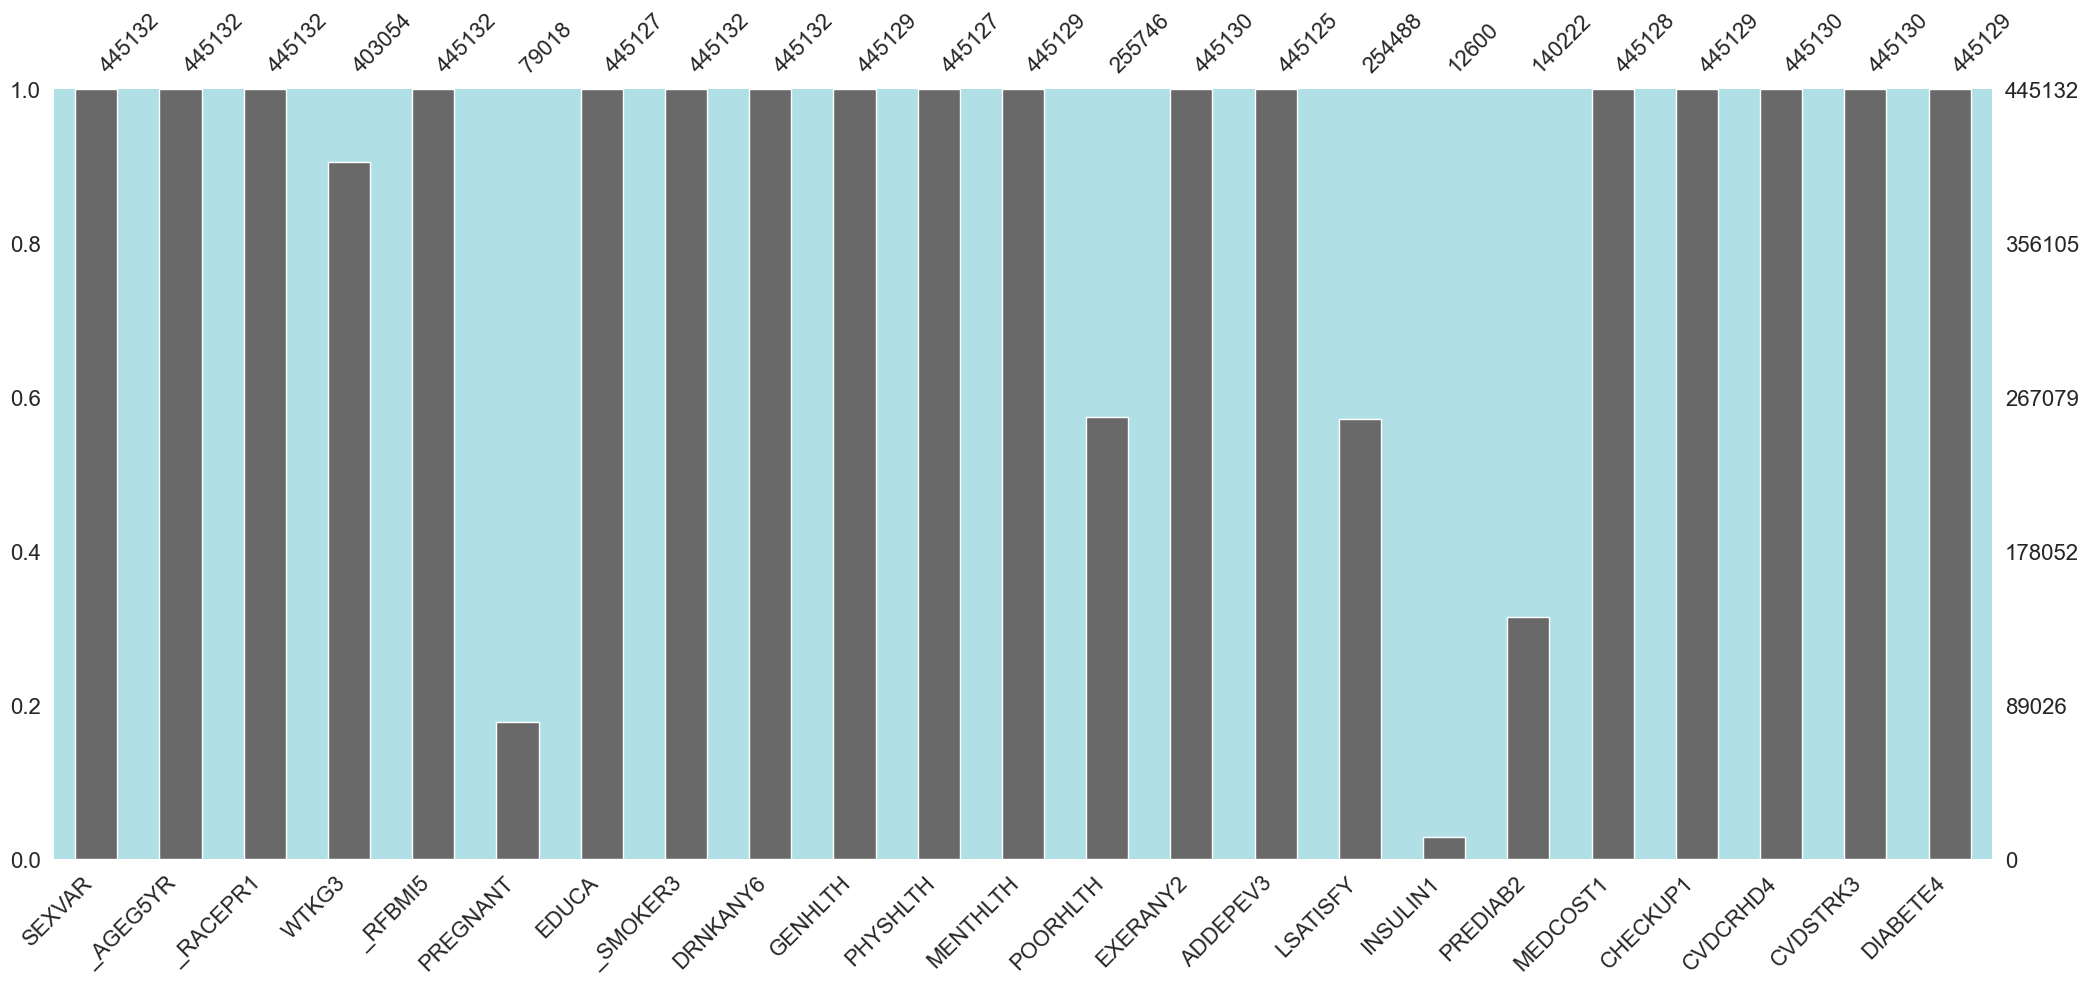

In [89]:
msno.bar(BRFSS_V1)
plt.show()

There are a lot of null values in this dataset. I will view each individual column one by one. For the columns that contain more than 50k null values , i will just remove them from the dataset as they are too many values to fill or impute, which can effect the model. 

### Remove those columns

In [90]:
BRFSS_V2 = BRFSS_V1.drop(['PREGNANT','POORHLTH','LSATISFY','INSULIN1','PREDIAB2'], axis=1)

In [91]:
BRFSS_V2.head()

,SEXVAR,_AGEG5YR,_RACEPR1,WTKG3,_RFBMI5,EDUCA,_SMOKER3,DRNKANY6,GENHLTH,PHYSHLTH,MENTHLTH,EXERANY2,ADDEPEV3,MEDCOST1,CHECKUP1,CVDCRHD4,CVDSTRK3,DIABETE4
0,2.0,13.0,1.0,NaN,9.0,6.0,4.0,2.0,2.0,88.0,88.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0
1,2.0,13.0,1.0,6804.0,2.0,4.0,4.0,2.0,1.0,88.0,88.0,2.0,2.0,2.0,8.0,2.0,2.0,3.0
2,2.0,8.0,1.0,6350.0,2.0,6.0,4.0,2.0,2.0,2.0,3.0,1.0,2.0,2.0,1.0,2.0,2.0,3.0
3,2.0,14.0,1.0,6350.0,1.0,4.0,2.0,2.0,1.0,88.0,88.0,1.0,2.0,2.0,1.0,2.0,2.0,3.0
4,2.0,5.0,1.0,5398.0,1.0,5.0,4.0,1.0,4.0,2.0,88.0,1.0,2.0,2.0,1.0,2.0,2.0,3.0


In [92]:
BRFSS_V2.isna().sum()

SEXVAR          0
_AGEG5YR        0
_RACEPR1        0
WTKG3       42078
_RFBMI5         0
EDUCA           5
_SMOKER3        0
DRNKANY6        0
GENHLTH         3
PHYSHLTH        5
MENTHLTH        3
EXERANY2        2
ADDEPEV3        7
MEDCOST1        4
CHECKUP1        3
CVDCRHD4        2
CVDSTRK3        2
DIABETE4        3
dtype: int64

In [93]:
BRFSS_V2.dtypes

SEXVAR      float64
_AGEG5YR    float64
_RACEPR1    float64
WTKG3       float64
_RFBMI5     float64
EDUCA       float64
_SMOKER3    float64
DRNKANY6    float64
GENHLTH     float64
PHYSHLTH    float64
MENTHLTH    float64
EXERANY2    float64
ADDEPEV3    float64
MEDCOST1    float64
CHECKUP1    float64
CVDCRHD4    float64
CVDSTRK3    float64
DIABETE4    float64
dtype: object

In [94]:
# drop all the null values
BRFSS_V2.dropna(inplace=True)

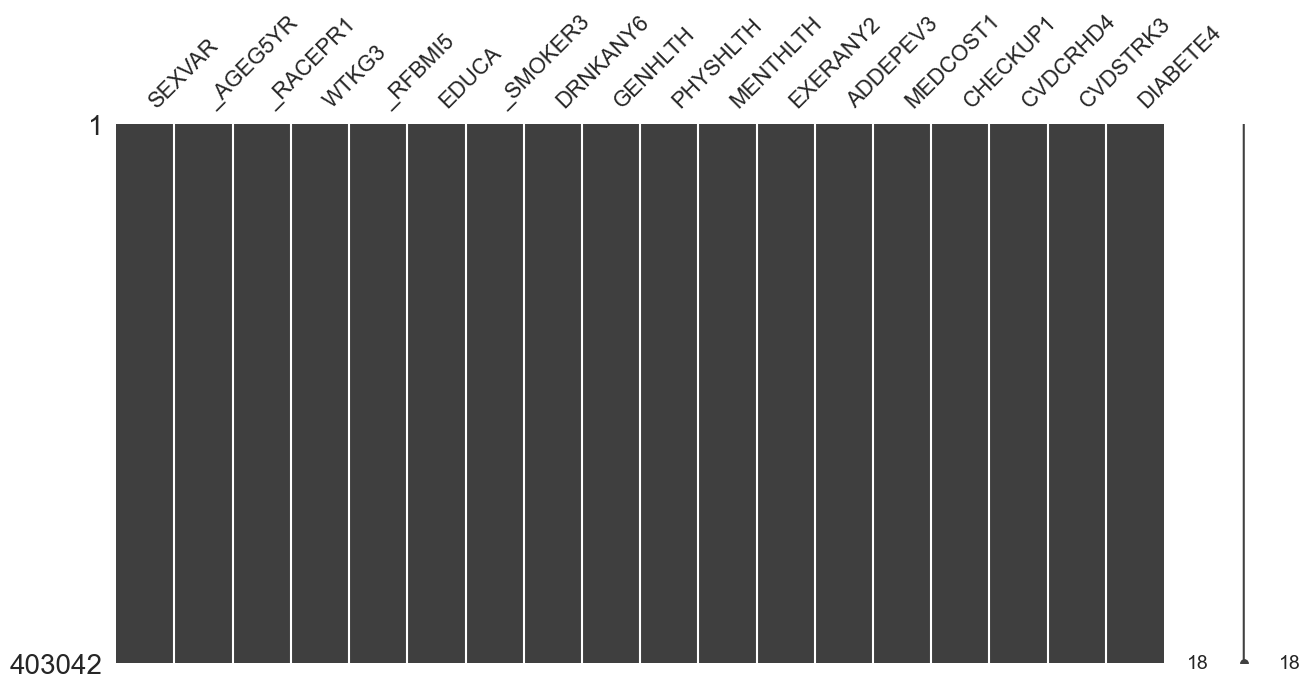

In [95]:
# no null values in dataset
msno.matrix(BRFSS_V2, figsize=(15,7))
plt.show()

In [15]:
BRFSS_V2.describe()

,SEXVAR,_AGEG5YR,_RACEPR1,WTKG3,_RFBMI5,EDUCA,_SMOKER3,DRNKANY6,GENHLTH,PHYSHLTH,MENTHLTH,EXERANY2,ADDEPEV3,MEDCOST1,CHECKUP1,CVDCRHD4,CVDSTRK3,DIABETE4
count,403042.000000,403042.000000,403042.000000,403042.000000,403042.000000,403042.000000,403042.000000,403042.000000,403042.000000,403042.000000,403042.000000,403042.000000,403042.000000,403042.000000,403042.000000,403042.000000,403042.000000,403042.000000
mean,1.514505,7.721364,1.911111,8307.481228,1.809816,5.053774,3.602329,1.926601,2.577148,58.884603,58.035014,1.249252,1.819681,1.933099,1.444646,1.986098,1.971209,2.746714
std,0.499790,3.643422,1.921619,2144.829226,1.043469,1.024882,1.411609,1.847702,1.080237,37.675109,37.935815,0.511327,0.576490,0.412368,1.101501,0.549980,0.350317,0.744158
min,1.000000,1.000000,1.000000,2268.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,5.000000,1.000000,6804.000000,1.000000,4.000000,3.000000,1.000000,2.000000,14.000000,12.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,3.000000
50%,2.000000,8.000000,1.000000,8074.000000,2.000000,5.000000,4.000000,1.000000,3.000000,88.000000,88.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,3.000000
75%,2.000000,11.000000,1.000000,9525.000000,2.000000,6.000000,4.000000,2.000000,3.000000,88.000000,88.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,3.000000
max,2.000000,14.000000,7.000000,29257.000000,9.000000,9.000000,9.000000,9.000000,9.000000,99.000000,99.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Montserrat;text-align:left;display:fill;border-radius:5px;background-color:teal;overflow:hidden">Feature exploration</div>

> <span style='font-size:28px; font-family:Verdana;color: orange;'><b>WTKG3 (Weight)</b></span>

The weight column contains very large numbers , making them hard to comprehend. From the codebook however , there was a formula given to convert these numbers into readable weight values in kilograms : 
`Weight in kilograms [2 implied decimal places]
Notes: 0001 <= WEIGHT2 <= 650 or 9023 <= WEIGHT2 <= 9295 (non-metric WEIGHT2 value divided by 2.2046)`

In [97]:
def convert_to_kg(weight):
    if 2300 <= weight <= 29500:
        return weight / 100  # Implied two decimal places, so dividing by 100
    elif 9023 <= weight <= 9295:
        return weight / 2.2046
    else:
        return None  # Return None for values outside the specified range

# Add renamed column to dataset
BRFSS_V2['weight'] = BRFSS_V2['WTKG3'].apply(convert_to_kg)

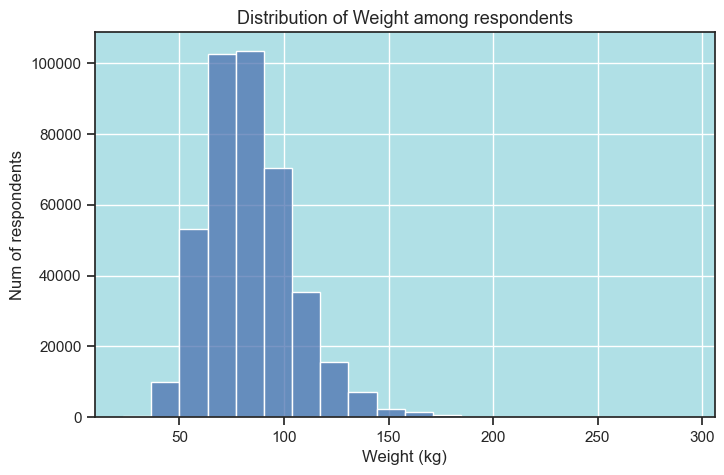

In [99]:
plt.figure(figsize=(8,5))
sns.histplot(data=BRFSS_V2, x='weight', bins=20)
plt.title('Distribution of Weight among respondents', fontsize=13)
plt.xlabel('Weight (kg)')
plt.ylabel('Num of respondents')
plt.grid(True, color='white')
plt.show()

- The distribution of weights among respondents is right-skewed.
- The majority of respondents have weights between 50 kg and 125 kg.
- The most common weight range appears to be between 75 kg and 100 kg, with the highest bars reaching just over 100,000 respondents.
- There are smaller numbers of respondents with weights less than 50 kg and more than 125 kg.
- Very few respondents have weights exceeding 200 kg, indicating these are outliers in the dataset.

> <span style='font-size:28px; font-family:Verdana;color: orange;'><b>SEXVAR (Sex)</b></span>

The sex column contains data as 1.0 for male and 2.0 for female. I will convert the data type from float to an integer

In [18]:
# Add renamed column to dataset
BRFSS_V2['sex'] = BRFSS_V2['SEXVAR'].astype('int')

In [19]:
sex_dist = BRFSS_V2['sex'].value_counts()

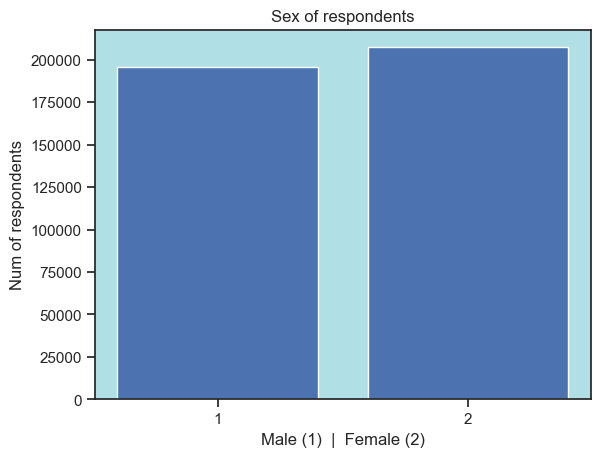

In [100]:
plt.bar(sex_dist.index, sex_dist.values)
plt.title('Sex of respondents')
plt.xlabel('Male (1)  |  Female (2)')
plt.xticks([1,2])
plt.ylabel('Num of respondents')
plt.show()

As seen from this bar chart , there are marginally more woman than men who were surveyed for this dataset:
- Male : 195,675
- Female : 207, 367

> <span style='font-size:28px; font-family:Verdana;color: orange;'><b>_AGEG5YR (Age range)</b></span>

Age range contains numbers from 1 - 13 , where each number represents an age range. The table below shows what each number represents :

 | Num    | Age range |
 |--------|-----------|
 | 1 | 18-24| 
 | 2 | 25-29| 
 | 3 | 30-34|
 | 4 | 35-39|
 | 5 | 40-44|
 | 6 | 45-49|
 | 7 | 50-54|
 | 8 | 55-59|
 | 9 | 60-64|
 | 10 | 65-69|
 | 11 | 70-74|
 | 12 | 75-79|
 | 13 | 80 or older|

In [102]:
# Add renamed column to dataset
BRFSS_V2['age_range'] = BRFSS_V2['_AGEG5YR'].astype('int')

In [103]:
BRFSS_V2['age_range'].value_counts()

age_range
10    43116
9     40464
11    39935
13    33746
8     33396
7     30393
12    30116
5     27107
4     25899
6     25836
1     24605
3     23414
2     20150
14     4865
Name: count, dtype: int64

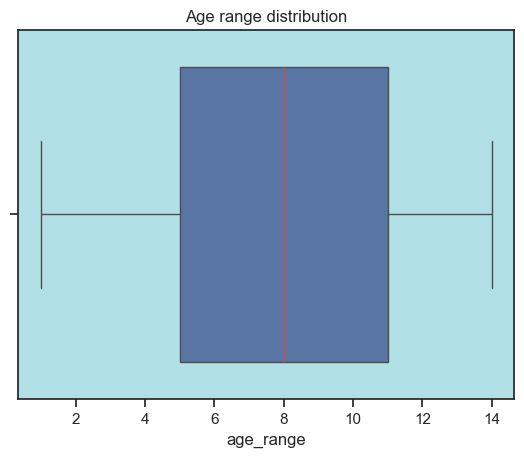

In [104]:
sns.boxplot(data=BRFSS_V2, x='age_range', medianprops={"color": "r", "linewidth": 1})
plt.title('Age range distribution')
plt.show()

- The age range values appear to span from approximately 2 to 14.
- The median age range is around 8.
- The interquartile range is approximately between 5 and 11.

> <span style='font-size:28px; font-family:Verdana;color: orange;'><b>_RACEPR1 (Race)</b></span>

| Code | Ethnicity                           |
|------|-------------------------------------|
| 1    | White                               |
| 2    | Black                               |
| 3    | American Indian or Alaska Native    |
| 4    | Asian                               |
| 5    | Pacific Islander or Native Hawaiian |
| 6    | Multiracial                         |
| 7    | Hispanic                            |

In [105]:
# Add renamed column to dataset
BRFSS_V2['race'] = BRFSS_V2['_RACEPR1'].astype('int')

race_dist = BRFSS_V2['_RACEPR1']

race_map = {
    1: "White",
    2: "Black",
    3: "American Indian or Alaska Native",
    4: "Asian",
    5: "Pacific Islander or Native Hawaiian",
    6: "Multiracial",
    7: "Hispanic"
}

race_dist = race_dist.map(race_map)

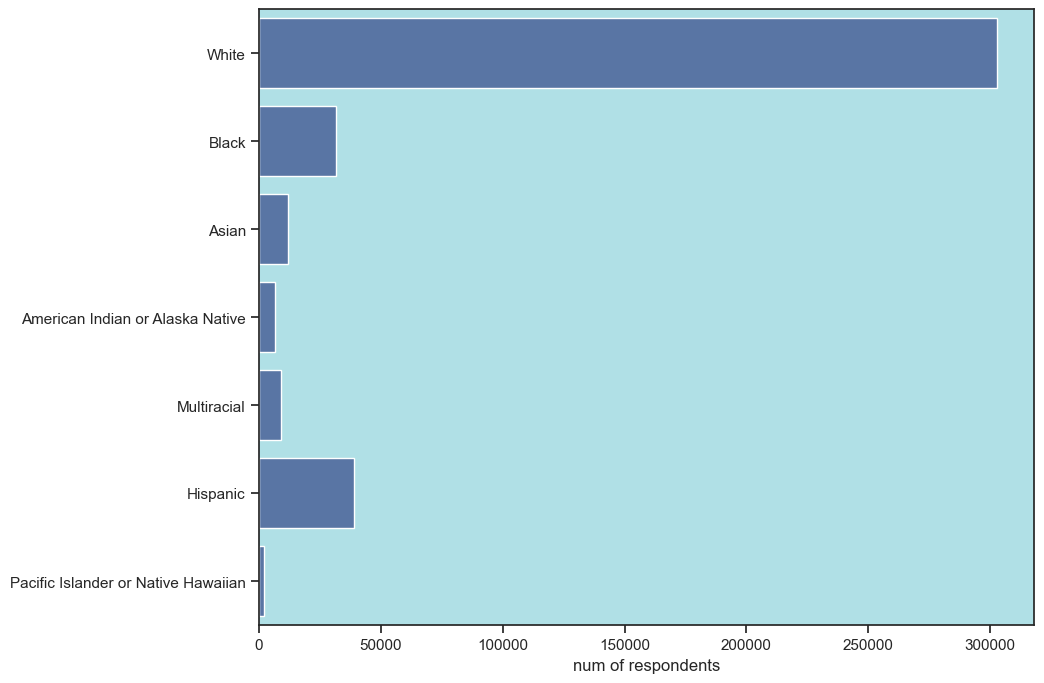

In [106]:
plt.figure(figsize=(10,8))
sns.countplot(race_dist)
plt.ylabel('')
plt.xlabel('num of respondents')
plt.show()

- White respondents constitute the largest group, with a count nearing 300,000.
- Black respondents are the second largest group, with a count between 50,000 and 100,000.
- Hispanic respondents form the third largest group, with a count slightly below 50,000.
- Asian, Multiracial, American Indian or Alaska Native, and Pacific Islander or Native Hawaiian respondents have comparatively smaller counts.
- Among these, Asian respondents are the most numerous, followed by Multiracial respondents.
- American Indian or Alaska Native and Pacific Islander or Native Hawaiian respondents have the smallest counts, both being significantly lower than the other categories.


- The data indicates a significant majority of respondents identify as White.
- There is a noticeable distribution of respondents among the different racial categories, reflecting the diversity of the population surveyed.

> <span style='font-size:28px; font-family:Verdana;color: orange;'><b>_RFBMI5 (BMI > 25)</b></span>

This column contains data of adults who have a body mass index greater than 25.00 (Overweight or Obese)  
|code| value|
|----|------|
|1 | no| 
|2 | yes| 
|9 | don't know|

I will remove all the 9's from the dataset , as they are not useful

In [107]:
BRFSS_V2 = BRFSS_V2[BRFSS_V2['_RFBMI5'] != 9]

# Add renamed column to dataset
BRFSS_V2['bmi_25'] = BRFSS_V2['_RFBMI5'].astype('int')

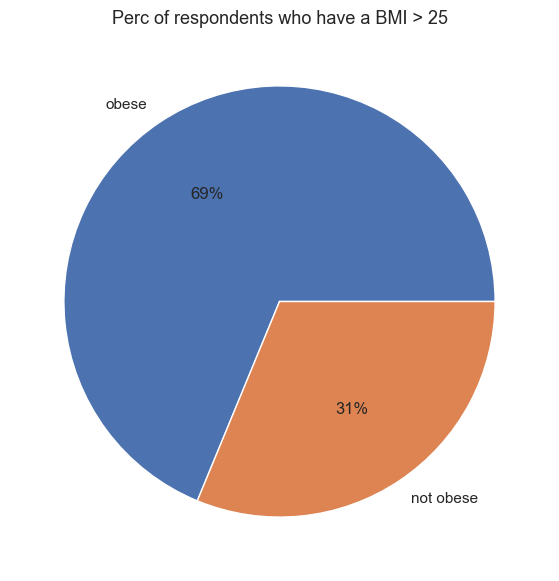

In [108]:
plt.figure(figsize=(8,7))
label = ['obese', 'not obese']
plt.pie(BRFSS_V2['_RFBMI5'].value_counts().values, labels=label, autopct='%.0f%%')
plt.title('Perc of respondents who have a BMI > 25', fontsize=13)
plt.show()

- A BMI greater than 25 is typically used as a threshold to identify overweight or obese individuals.
- The chart shows that 69% of the respondents have a BMI greater than 25, indicating a significant portion of the population falls into the overweight or obese category.
- Conversely, 31% of the respondents have a BMI of 25 or less, indicating they are not classified as overweight or obese.
- The high percentage (69%) of respondents with a BMI over 25 suggests a potential public health concern, as being overweight or obese is associated with various health risks, including cardiovascular diseases, diabetes, and certain cancers.

> <span style='font-size:28px; font-family:Verdana;color: orange;'><b>EDUCA (Education level)</b></span>

This column contains data about education level of each respondent. The data ranges from 1 - 9 , with each number represented as shown in the table below

| Code | Education Level            |
|------|----------------------------|
| 1    | Never went to school       |
| 2    | Elementary                 |
| 3    | High school                |
| 4    | High school graduate       |
| 5    | Technical college          |
| 6    | College graduate           |
| 9    | Refused answer             |

i will remove all rows that answered 9 , as they are not useful

In [109]:
BRFSS_V2 = BRFSS_V2[BRFSS_V2['EDUCA'] != 9]

# Add renamed column to dataset
BRFSS_V2['education_level'] = BRFSS_V2['EDUCA'].astype('int') 

In [110]:
education_levels = {
    1: "Never went to school",
    2: "Elementary",
    3: "High school",
    4: "High school grad",
    5: "Technical college",
    6: "College grad"
}

edu_dist = BRFSS_V2['EDUCA'].map(education_levels)

edu_dist = edu_dist.value_counts()

In [111]:
edu_dist

EDUCA
College grad            168576
Technical college       108172
High school grad         96725
High school              14850
Elementary                6506
Never went to school       437
Name: count, dtype: int64

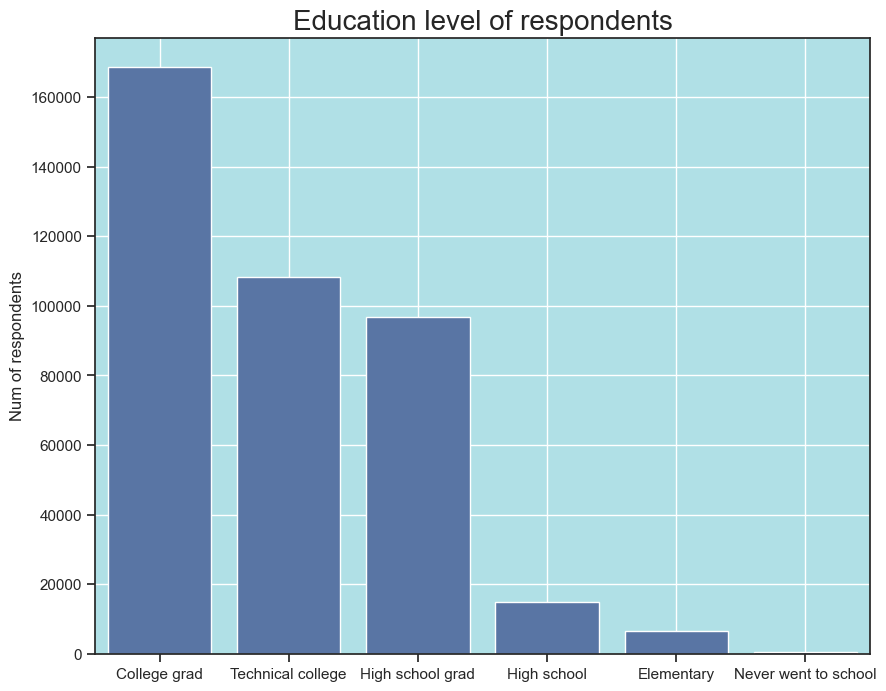

In [114]:
plt.figure(figsize=(10,8))
sns.barplot(edu_dist)
plt.title('Education level of respondents', fontsize=20)
plt.ylabel('Num of respondents')
plt.xlabel('')
plt.grid(True, color='white')
plt.show()

- Majority off respondents are well educated , with 168,576 people being college graduates and 108,172 people having completed some sort of technical college.
- There is a noticeable drop in the number of respondents with only a high school education or less.

> <span style='font-size:28px; font-family:Verdana;color: orange;'><b>_SMOKER3 (Smoking status)</b></span>

This column contains smoking data of each respondent, where each number represents a status of smoking: 

| Code | Smoker Status       |
|------|---------------------|
| 1    | Everyday smoker     |
| 2    | Someday smoker      |
| 3    | Former smoker       |
| 4    | Non-smoker          |
| 9    | Refuse              |

Again, like previous columns, i am going to remove rows that contain code 9 as a answer because its not useful

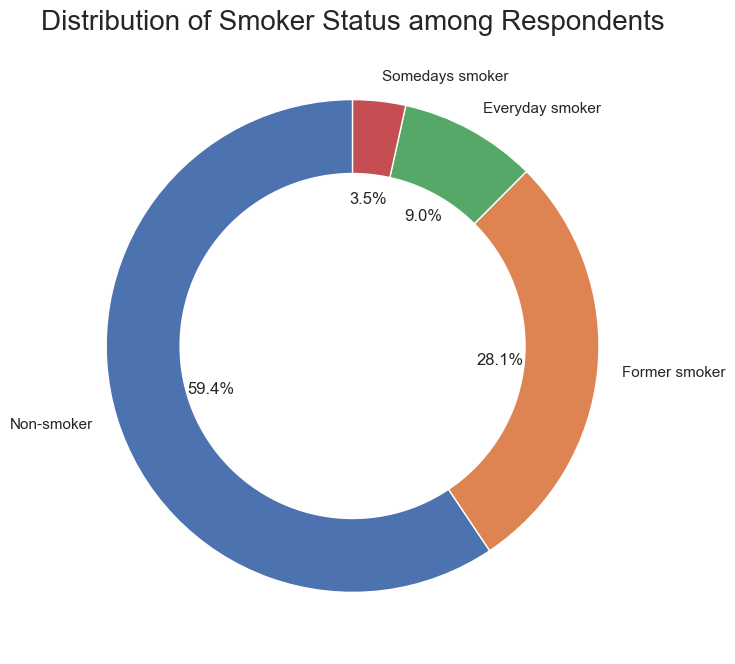

In [32]:
# Remove all rows that contain answer 9
BRFSS_V2 = BRFSS_V2[BRFSS_V2['_SMOKER3'] != 9]

# Add renamed column to dataset
BRFSS_V2['smoking_status'] = BRFSS_V2['_SMOKER3'].astype('int')

# Create a dictionary to map values , for visualisation purposes
smoke_map = {1:'Everyday smoker', 2:'Somedays smoker', 3:'Former smoker', 4:'Non-smoker'}

# Map the said dictionary to column
smoke_viz = BRFSS_V2['_SMOKER3'].map(smoke_map)

# Get the count of each category
smoke_counts = smoke_viz.value_counts()

# Create the donut chart
plt.figure(figsize=(8, 8))
plt.pie(smoke_counts, labels=smoke_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.8))

# Add a circle at the center to make it a donut
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Distribution of Smoker Status among Respondents', fontsize=20)
plt.show()

- The largest percentage of respondents, 59.4%, are non-smokers.
- 28.1% of respondents are former smokers.
- There are 9.0% of respondents who smoke everyday.
- 3.5% of respondents are somedays smokers.

> <span style='font-size:28px; font-family:Verdana;color: orange;'><b>DRNKANY6 (Alcohol over the past 30 days)</b></span>

This column contains data about adults who have had at least one drink in the past 30 days:

| Code | Description  |
|------|--------------|
| 1    | Yes          |
| 2    | No           |
| 7    | Not sure     |
| 9    | Missing      |

I will remove all rows that contain 7 and 9, as they are not useful

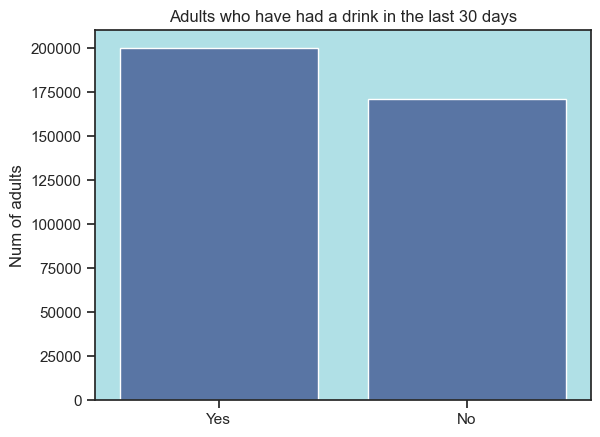

In [115]:
# Remove rows containing 7 and 9
BRFSS_V2 = BRFSS_V2[BRFSS_V2['DRNKANY6'] != 7]
BRFSS_V2 = BRFSS_V2[BRFSS_V2['DRNKANY6'] != 9]

# Add renamed column to dataset
BRFSS_V2['alcohol_30days'] = BRFSS_V2['DRNKANY6'].astype('int')

# Create a map for visualisation purposes
alco_map = {1:'Yes', 2:'No'}

alco_dist = BRFSS_V2['alcohol_30days'].map(alco_map)

sns.barplot(alco_dist.value_counts())
plt.title('Adults who have had a drink in the last 30 days')
plt.xlabel('')
plt.ylabel('Num of adults')
plt.show()

- There are more adults who have had a drink in the past 30 days (198,907) than adults who haven't (170,150)

> <span style='font-size:28px; font-family:Verdana;color: orange;'><b>GENHLTH (General health)</b></span>

This column contains data about respondents general health, where each number represents their state of general health:

| Code | Description          |
|------|----------------------|
| 1    | Excellent            |
| 2    | Very good            |
| 3    | Good                 |
| 4    | Fair                 |
| 5    | Poor                 |
| 7    | Don't know           |
| 9    | Not asked/refused    |

Going to remove rows that contain 7, 9 as answers, as they are not useful

In [34]:
BRFSS_V2['GENHLTH'].sample(5)

425183    3.0
399949    3.0
189043    3.0
170295    3.0
95696     2.0
Name: GENHLTH, dtype: float64

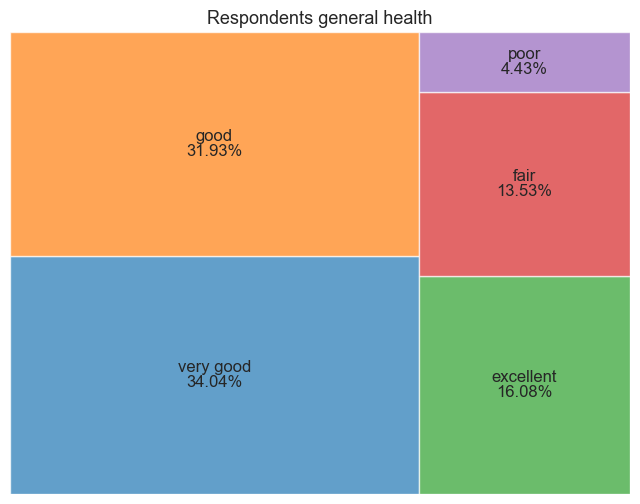

In [35]:
# Remove rows with 7, 9
BRFSS_V2 = BRFSS_V2[BRFSS_V2['GENHLTH'] != 7]
BRFSS_V2 = BRFSS_V2[BRFSS_V2['GENHLTH'] != 9]

# Add renamed data onto table
BRFSS_V2['general_health'] = BRFSS_V2['GENHLTH'].astype('int')

# Map values for visualisation purposes
hlth_map = {1:'excellent', 2:'very good', 3:'good', 4:'fair', 5:'poor'}
hlth_dist = BRFSS_V2['general_health']
hlth_dist = hlth_dist.map(hlth_map)

sizes = hlth_dist.value_counts().values
labels = hlth_dist.value_counts().index

# Calculate percentage values
percentages = [f'{(size / sum(sizes)) * 100:.2f}%' for size in sizes]

# Create treemap
plt.figure(figsize=(8, 6))
squarify.plot(sizes=sizes, label=labels, alpha=0.7, color=sns.color_palette("tab10"), value=percentages)

plt.title('Respondents general health', fontsize=13)
plt.axis('off')  
plt.show()

In [36]:
hlth_dist.value_counts()

general_health
very good    125351
good         117579
excellent     59213
fair          49827
poor          16302
Name: count, dtype: int64

- Over two-thirds of respondents (65.97%) rated their health as either "good" or "very good".
- 13.53% of respondents rated their health as fair.
- The least common response was "poor", at 4.43%.

> <span style='font-size:28px; font-family:Verdana;color: orange;'><b>PHYSHLTH (Physical health)</b></span>

For how many days in the past 30 days was your physical health not good, numbers represents value:

| Code | Description            |
|------|------------------------|
| 1-30 | Number of days         |
| 88   | None                   |
| 77   | Don't know             |
| 99   | Refused                |
| BLANK| Not asked/Missed       |


I will remove rows with 77, 99 as responses

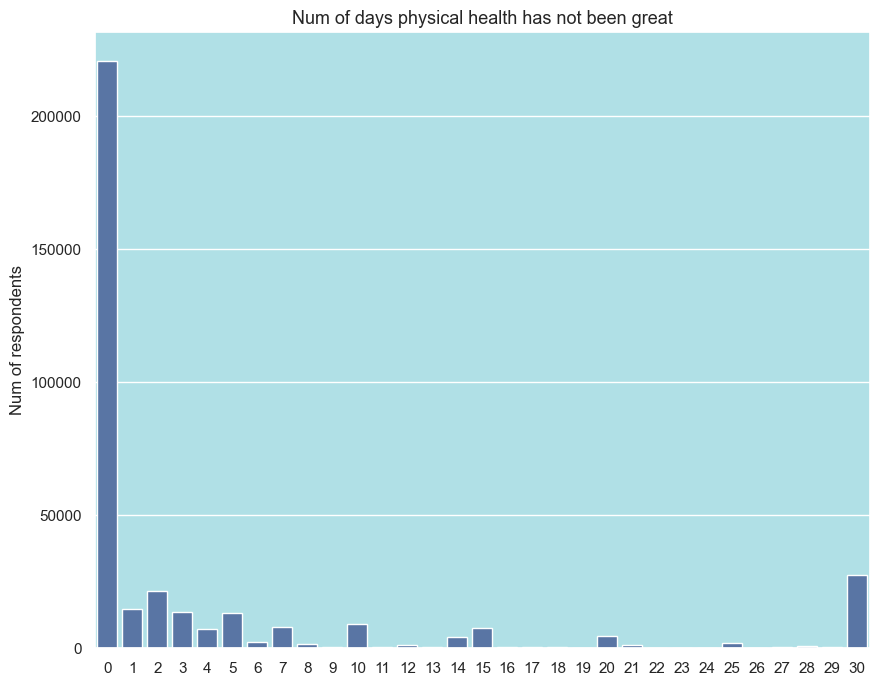

In [37]:
# Remove rows with 77,99
BRFSS_V2 = BRFSS_V2[BRFSS_V2['PHYSHLTH'] != 77]
BRFSS_V2 = BRFSS_V2[BRFSS_V2['PHYSHLTH'] != 99]

# Replace 88 with 0
BRFSS_V2['PHYSHLTH'] = BRFSS_V2['PHYSHLTH'].replace(88, 0)

# Add renamed column to table
BRFSS_V2['physical_health'] = BRFSS_V2['PHYSHLTH'].astype('int')


phys_dist = BRFSS_V2['physical_health'].value_counts()

plt.figure(figsize=(10,8))
sns.barplot(phys_dist)
plt.title('Num of days physical health has not been great', fontsize=13)
plt.xlabel('')
plt.ylabel('Num of respondents')
plt.show()

- Most respondents have great physical health , with  218,319 respondents saying there physical health was bad for 0 days
- Over 50,000 respondents however, did have between 1-5 days of bad physical health in the last 30 days
- 26,773 people also had bad physical health throughout the month (30 days)

> <span style='font-size:28px; font-family:Verdana;color: orange;'><b>MENTHLTH (Mental health)</b></span>

For how many days in the past 30 days was your mental health not good, numbers represents value:

| Code | Description            |
|------|------------------------|
| 1-30 | Number of days         |
| 88   | None                   |
| 77   | Don't know             |
| 99   | Refused                |
| BLANK| Not asked/Missed       |


I will remove rows with 77, 99 as responses

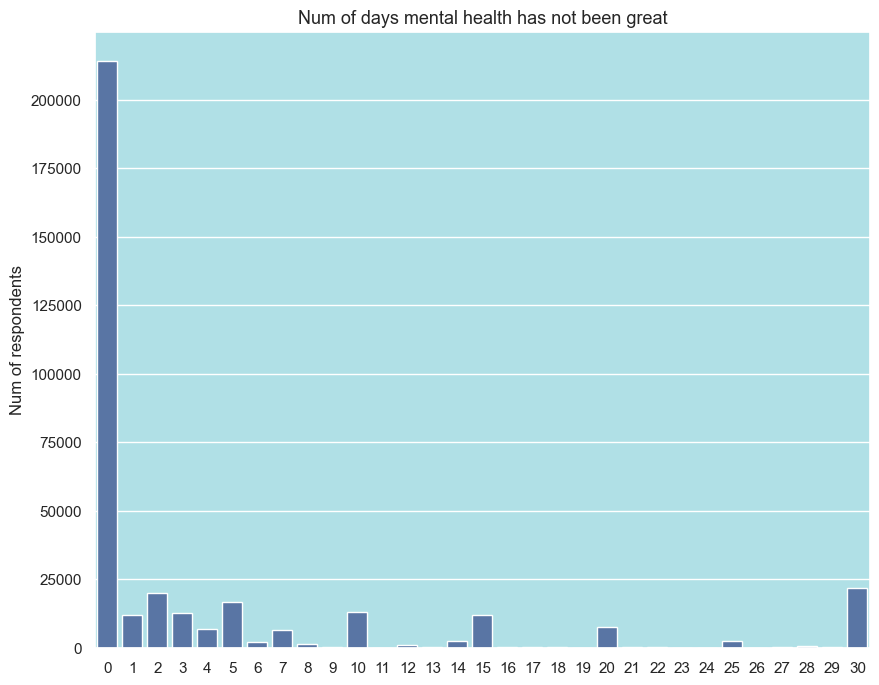

In [38]:
# Remove rows with 77,99
BRFSS_V2 = BRFSS_V2[BRFSS_V2['MENTHLTH'] != 77]
BRFSS_V2 = BRFSS_V2[BRFSS_V2['MENTHLTH'] != 99]

# Replace 88 with 0 
BRFSS_V2['MENTHLTH'] = BRFSS_V2['MENTHLTH'].replace(88, 0)

# Add renamed column to table
BRFSS_V2['mental_health'] = BRFSS_V2['MENTHLTH'].astype('int')


ment_dist = BRFSS_V2['mental_health'].value_counts()

plt.figure(figsize=(10,8))
sns.barplot(ment_dist)
plt.title('Num of days mental health has not been great', fontsize=13)
plt.xlabel('')
plt.ylabel('Num of respondents')
plt.show()

- Majority of respondents (214,090) had 0 days of bad mental health
- There are a some respondents (21,693) who have had 30 days of bad mental health in 30 days
- Over 82,000 repondents have had bad mental health for 1-15 days in a month

> <span style='font-size:28px; font-family:Verdana;color: orange;'><b>EXERANY2 (Exercise)</b></span>

This column contains data about respondents, asking them if they have exercised in the past month:

| Code | Description  |
|------|--------------|
| 1    | Yes          |
| 2    | No           |
| 7    | Not sure     |
| 9    | Missing      |

Get rid of rows that contain 7,9 as responses

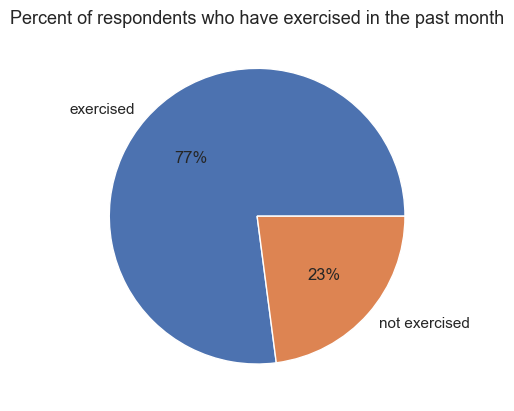

In [39]:
# Remove rows
BRFSS_V2 = BRFSS_V2[BRFSS_V2['EXERANY2'] != 7]
BRFSS_V2 = BRFSS_V2[BRFSS_V2['EXERANY2'] != 9]

# Add renamed column to table
BRFSS_V2['exercise_30'] = BRFSS_V2['EXERANY2'].astype('int')

exer_dist = BRFSS_V2['exercise_30'].value_counts()
label = ['exercised', 'not exercised']

plt.pie(exer_dist.values, labels=label, autopct='%.0f%%')
plt.title('Percent of respondents who have exercised in the past month', fontsize=13)
plt.show()

In [40]:
exer_dist

exercise_30
1    274061
2     81541
Name: count, dtype: int64

- 274,061 (77%) of respondents have exercised in the past month
- 81,541 (23%) of respondents have not exercised in the past month
- majority of respondents are health conscious, and do exercise 

> <span style='font-size:28px; font-family:Verdana;color: orange;'><b>ADDEPEV3 (Depressive disorder)</b></span>

This column contains data about respondents, asking them if they have a depressive disorder (including depression, major depression, dysthymia, or minor depression):

| Code | Description  |
|------|--------------|
| 1    | Yes          |
| 2    | No           |
| 7    | Not sure     |
| 9    | Missing      |

Get rid of rows that contain 7,9 as responses

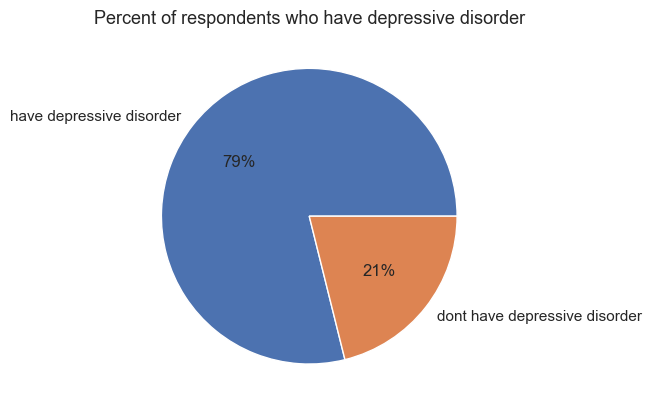

In [41]:
# Remove rows
BRFSS_V2 = BRFSS_V2[BRFSS_V2['ADDEPEV3'] != 7]
BRFSS_V2 = BRFSS_V2[BRFSS_V2['ADDEPEV3'] != 9]

# Add renamed column to table
BRFSS_V2['depressive_disorder'] = BRFSS_V2['ADDEPEV3'].astype('int')

dep_dist = BRFSS_V2['depressive_disorder'].value_counts()
label = ['have depressive disorder', 'dont have depressive disorder']

plt.pie(dep_dist.values, labels=label, autopct='%.0f%%')
plt.title('Percent of respondents who have depressive disorder', fontsize=13)
plt.show()

In [42]:
dep_dist

depressive_disorder
2    279243
1     74759
Name: count, dtype: int64

- Majority of the respondents (279,243) or 79% , have had a depressive disorder
- 21% (74,759) have never had a depressive disorder

> <span style='font-size:28px; font-family:Verdana;color: orange;'><b>MEDCOST1 (Medical cost affordability)</b></span>

This column contains data about respondents, asking them if they were ever in need to visit a doctor over the past year, and couldnt afford it:

| Code | Description  |
|------|--------------|
| 1    | Yes          |
| 2    | No           |
| 7    | Not sure     |
| 9    | Missing      |

Get rid of rows that contain 7,9 as responses

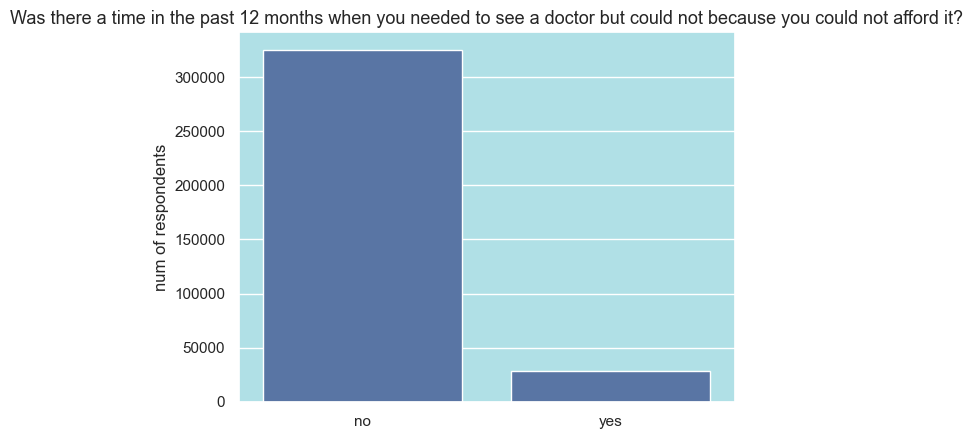

In [43]:
# Remove rows
BRFSS_V2 = BRFSS_V2[BRFSS_V2['MEDCOST1'] != 7]
BRFSS_V2 = BRFSS_V2[BRFSS_V2['MEDCOST1'] != 9]

# Add renamed column to table
BRFSS_V2['afford_medical'] = BRFSS_V2['MEDCOST1'].astype('int')

med_map = {1:'yes', 2:'no'}
med_cost = BRFSS_V2['afford_medical'].map(med_map)
med_cost = med_cost.value_counts()


sns.barplot(med_cost)
plt.title('Was there a time in the past 12 months when you needed to see a doctor but could not because you could not afford it?', fontsize=13)
plt.xlabel('')
plt.ylabel('num of respondents')
plt.show()

- most of the respondents (> 300k) were able to afford a doctor
- there are a few respondents (< 30k) who were not able to afford a doctor. This could increase there chances of having a chronic illness , as they would not have been diagnosed and then subsequently treated

> <span style='font-size:28px; font-family:Verdana;color: orange;'><b>CHECKUP1 (Check up)</b></span>

This column contains data about respondents, About how long has it been since you last visited a doctor for a routine checkup?:

| Code | Description       |
|------|-------------------|
| 1    | Less than 1 year  |
| 2    | 1-2 years         |
| 3    | 2-5 years         |
| 4    | More than 5 years |
| 7    | Not sure          |
| 8    | Never             |
| 9    | Refused           |
| BLANK| Missing           |

gonna remove rows with 7,9 as responses

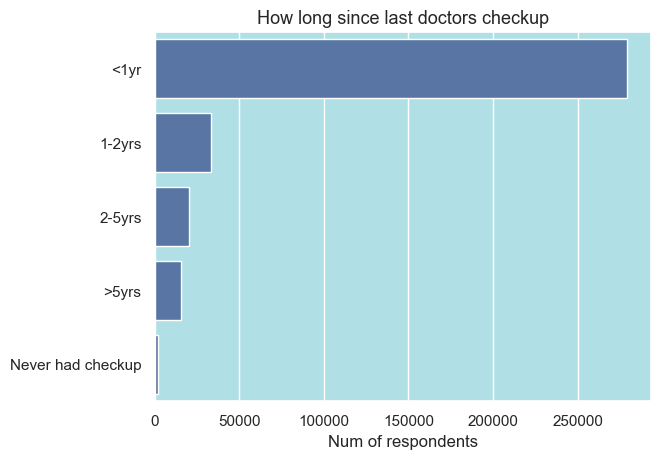

In [44]:
# Remove rows with 7,9 as responses
BRFSS_V2 = BRFSS_V2[BRFSS_V2['CHECKUP1'] !=7 ]
BRFSS_V2 = BRFSS_V2[BRFSS_V2['CHECKUP1'] !=9 ]

# Add renamed column 
BRFSS_V2['checkup'] = BRFSS_V2['CHECKUP1'].astype('int')

# Create map for visualisation purposes
check_map = {1:'<1yr', 2:'1-2yrs', 3:'2-5yrs', 4:'>5yrs', 8:'Never had checkup'}

check_dist = BRFSS_V2['checkup'].map(check_map)
check_dist = check_dist.value_counts()

sns.barplot(check_dist, orient='h')
plt.title('How long since last doctors checkup', fontsize=13)
plt.xlabel('Num of respondents')
plt.ylabel('')
plt.show()

- The majority of respondents had a routine checkup within the last year (<1yr), with over 250,000 respondents.
- The second largest group had a checkup 1-2 years ago, with around 50,000 respondents.
- Fewer respondents reported having a checkup 2-5 years ago or more than 5 years ago.
- Very few respondents reported that they had never had a checkup.

- The data suggests that most people tend to have routine checkups within the last year. As the time interval increases, the number of respondents decreases significantly

> <span style='font-size:28px; font-family:Verdana;color: orange;'><b>CVDCRHD4 (Coronary heart disease)</b></span>

This column contains data about respondents, if they have had angina or coronary heart disease:

| Code | Description  |
|------|--------------|
| 1    | Yes          |
| 2    | No           |
| 7    | Not sure     |
| 9    | Missing      |

Get rid of rows that contain 7,9 as responses

In [45]:
# Remove rows with 7,9 as responses
BRFSS_V2 = BRFSS_V2[BRFSS_V2['CVDCRHD4'] != 7]
BRFSS_V2 = BRFSS_V2[BRFSS_V2['CVDCRHD4'] != 9]

# Add renamed column onot table
BRFSS_V2['coronary_heart_disease'] = BRFSS_V2['CVDCRHD4'].astype('int')

# Map vals for visualisation purposes
chd_map = {1:'yes', 2:'no'}
chd_dist = BRFSS_V2['coronary_heart_disease'].map(chd_map)
chd_dist = chd_dist.value_counts().reset_index()
chd_dist.columns = ['status', 'count']

# Create bubble chart
fig = px.scatter(chd_dist, x='status', y='count', size='count', color='status',
                 hover_name='status', size_max=80)

fig.update_layout(title='Coronary Heart Disease Distribution', xaxis_title='Status', yaxis_title='num of respondents', width=400)
fig.show()

- As seen from the bubble chart, 325,821 respondents have never had angina / coronary heart diseas
- 21,313 respondents have had angina / coronary heart disease in the past

> <span style='font-size:28px; font-family:Verdana;color: orange;'><b>CVDSTRK3 (Stroke)</b></span>

This column contain data about respondents, wether if they have had a stroke or not? :

| Code | Description  |
|------|--------------|
| 1    | Yes          |
| 2    | No           |
| 7    | Not sure     |
| 9    | Missing      |

Get rid of rows that contain 7,9 as responses

In [46]:
# Remove rows with 7,9 as responses
BRFSS_V2 = BRFSS_V2[BRFSS_V2['CVDSTRK3'] != 7]
BRFSS_V2 = BRFSS_V2[BRFSS_V2['CVDSTRK3'] != 9]

# Add new column to table
BRFSS_V2['stroke'] = BRFSS_V2['CVDSTRK3'].astype('int')

# Map vals for visualisation purposes
stroke_map = {1:'yes', 2:'no'}
stroke_dist = BRFSS_V2['stroke'].map(stroke_map)
stroke_dist = stroke_dist.value_counts().reset_index()
stroke_dist.columns = ['status', 'count']

# Create bubble chart
fig = px.scatter(stroke_dist, x='status', y='count', size='count', color='status',
                 hover_name='status', size_max=80)

fig.update_layout(title='Stroke Distribution', xaxis_title='Status', yaxis_title='num of respondents', width=400)
fig.show()

- 331,841 respondents have never had stroke
- 14,561 respondents have had a stroke before

> <span style='font-size:28px; font-family:Verdana;color: orange;'><b>DIABETE4 (Diabetes status - OUTCOME)</b></span>

This column is the outcome variable (y), it contains data from the question - Ever told you had  diabetes?:

| Code | Description                                         |
|------|-----------------------------------------------------|
| 1    | Yes                                                 |
| 2    | Yes, only during pregnancy                          |
| 3    | No                                                  |
| 4    | No, but pre-diabetes                                |
| 7    | Not sure                                            |
| 9    | Refused                                             |
| BLANK| Missed                                              |

- I will remove rows 7,9 from table as its of no use
- i will merge rows with 1,2 responses as 1
- code 3 responses will be changed to code 0
- prediabetic code will be 

I will make this column into a binary outcome, that will help with the ML models later on in this project. 
1 = Diabetes
0 = No diabetes

In [47]:
# Remove rows 7,9 as responses
BRFSS_V2 = BRFSS_V2[BRFSS_V2['DIABETE4'] != 7]
BRFSS_V2 = BRFSS_V2[BRFSS_V2['DIABETE4'] != 9]

# Add new column onot table
BRFSS_V2['diabetes'] = BRFSS_V2['DIABETE4'].astype('int')

# Replace vals 
BRFSS_V2['diabetes'] = BRFSS_V2['diabetes'].replace({2:1, 3:0, 4:1})

diab_map = {0:'No diabetes', 1:'Diabetes'}
diab_dist = BRFSS_V2['diabetes'].map(diab_map)
diab_dist = diab_dist.value_counts()

plt.figure(figsize=(9,9))

# Create pie chart
fig = go.Figure(data=[go.Pie(labels=diab_dist.index, values=diab_dist, textinfo='label+percent')])

# Update layout for better visualization
fig.update_layout(
    title_text='Percentage of respondents with diabetes',
    title_font=dict(size=30),
    height=700,
    width=1000)

# Show plot
fig.show()


<Figure size 900x900 with 0 Axes>

- 83.3% (288,142) respondents have never had diabetes
- 16.7% (57,844) respondents have diabetes

# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Montserrat;text-align:left;display:fill;border-radius:5px;background-color:teal;overflow:hidden">Identifying relationships</div>

In [48]:
BRFSS_V2.head()

,SEXVAR,_AGEG5YR,_RACEPR1,WTKG3,_RFBMI5,EDUCA,_SMOKER3,DRNKANY6,GENHLTH,PHYSHLTH,MENTHLTH,EXERANY2,ADDEPEV3,MEDCOST1,CHECKUP1,CVDCRHD4,CVDSTRK3,DIABETE4,weight,sex,age_range,race,bmi_25,education_level,smoking_status,alcohol_30days,general_health,physical_health,mental_health,exercise_30,depressive_disorder,afford_medical,checkup,coronary_heart_disease,stroke,diabetes
1,2.0,13.0,1.0,6804.0,2.0,4.0,4.0,2.0,1.0,0.0,0.0,2.0,2.0,2.0,8.0,2.0,2.0,3.0,68.04,2,13,1,2,4,4,2,1,0,0,2,2,2,8,2,2,0
2,2.0,8.0,1.0,6350.0,2.0,6.0,4.0,2.0,2.0,2.0,3.0,1.0,2.0,2.0,1.0,2.0,2.0,3.0,63.50,2,8,1,2,6,4,2,2,2,3,1,2,2,1,2,2,0
3,2.0,14.0,1.0,6350.0,1.0,4.0,2.0,2.0,1.0,0.0,0.0,1.0,2.0,2.0,1.0,2.0,2.0,3.0,63.50,2,14,1,1,4,2,2,1,0,0,1,2,2,1,2,2,0
4,2.0,5.0,1.0,5398.0,1.0,5.0,4.0,1.0,4.0,2.0,0.0,1.0,2.0,2.0,1.0,2.0,2.0,3.0,53.98,2,5,1,1,5,4,1,4,2,0,1,2,2,1,2,2,0
5,1.0,13.0,1.0,8482.0,2.0,4.0,4.0,2.0,5.0,1.0,0.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,84.82,1,13,1,2,4,4,2,5,1,0,2,2,2,1,2,1,1


### Subset the data with data that i have renamed and have correct datatype

In [49]:
BRFSS_V3 = BRFSS_V2.iloc[:, 18:]

In [50]:
BRFSS_V3.head()

,weight,sex,age_range,race,bmi_25,education_level,smoking_status,alcohol_30days,general_health,physical_health,mental_health,exercise_30,depressive_disorder,afford_medical,checkup,coronary_heart_disease,stroke,diabetes
1,68.04,2,13,1,2,4,4,2,1,0,0,2,2,2,8,2,2,0
2,63.50,2,8,1,2,6,4,2,2,2,3,1,2,2,1,2,2,0
3,63.50,2,14,1,1,4,2,2,1,0,0,1,2,2,1,2,2,0
4,53.98,2,5,1,1,5,4,1,4,2,0,1,2,2,1,2,2,0
5,84.82,1,13,1,2,4,4,2,5,1,0,2,2,2,1,2,1,1


In [51]:
BRFSS_V3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 345986 entries, 1 to 445131
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   weight                  345985 non-null  float64
 1   sex                     345986 non-null  int64  
 2   age_range               345986 non-null  int64  
 3   race                    345986 non-null  int64  
 4   bmi_25                  345986 non-null  int64  
 5   education_level         345986 non-null  int64  
 6   smoking_status          345986 non-null  int64  
 7   alcohol_30days          345986 non-null  int64  
 8   general_health          345986 non-null  int64  
 9   physical_health         345986 non-null  int64  
 10  mental_health           345986 non-null  int64  
 11  exercise_30             345986 non-null  int64  
 12  depressive_disorder     345986 non-null  int64  
 13  afford_medical          345986 non-null  int64  
 14  checkup                 3

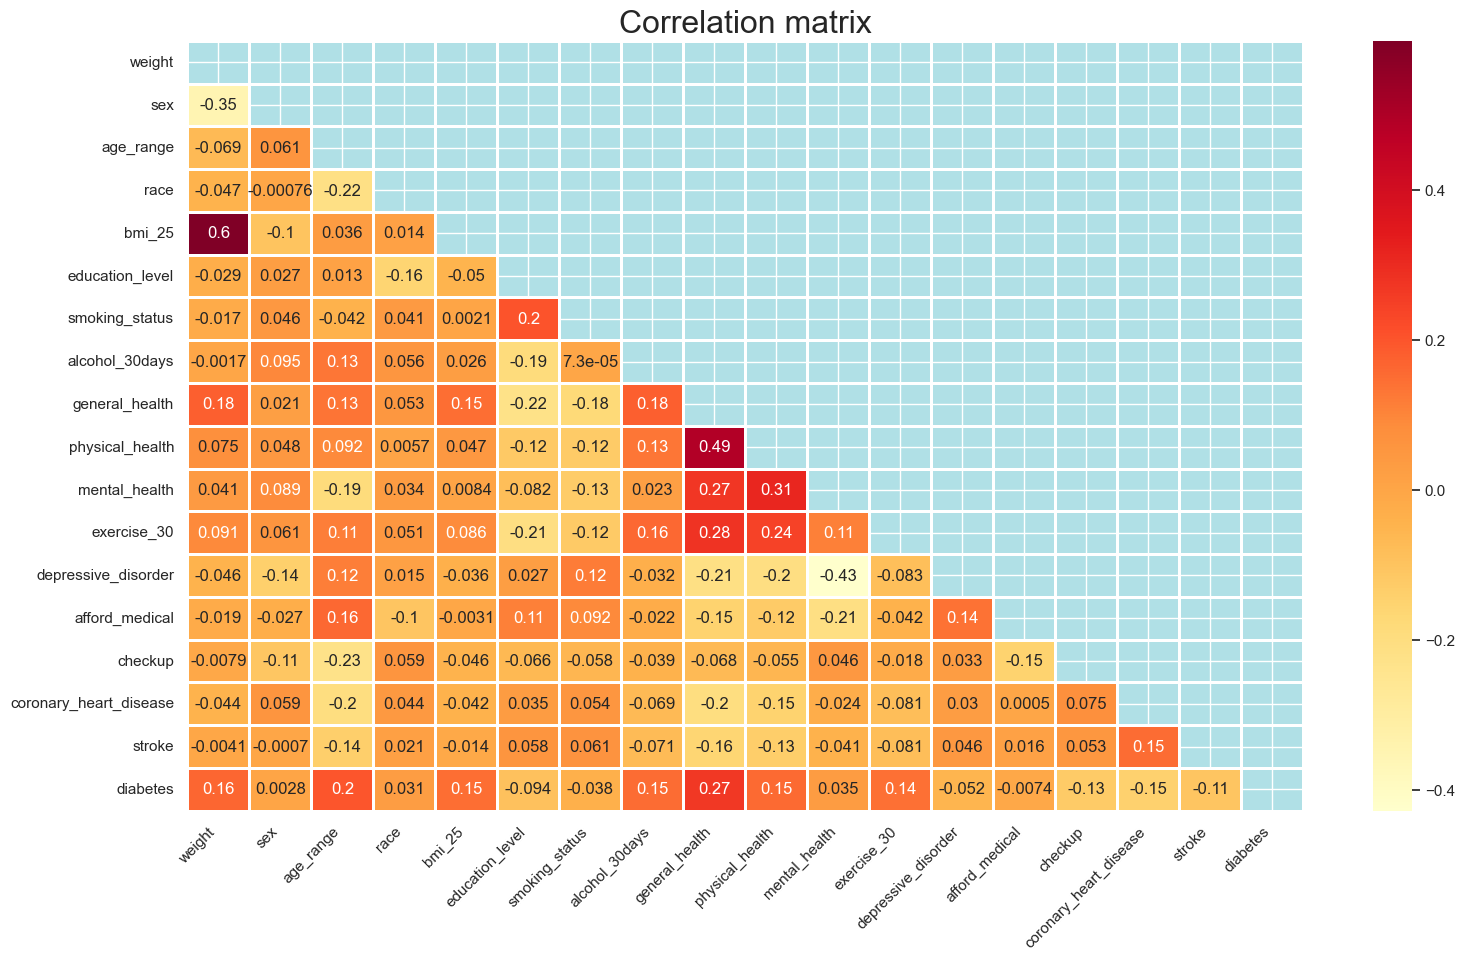

In [52]:
plt.figure(figsize=(18,10))
matrix = np.triu(BRFSS_V3.corr())
sns.heatmap(BRFSS_V3.corr(), cmap='YlOrRd', annot=True, mask=matrix, linewidth=0.8)
plt.title('Correlation matrix', fontsize=23)
plt.xticks(rotation=45, ha='right')
plt.show()

- `Diabetes` has a relatively positive correlation with `general_health (0.27)` , `age_range (0.2)`,  `exercise_30 (0.14)` , `alcohol_30days, bmi_25 (0.15)`, and `weight, physical_health (0.16)`

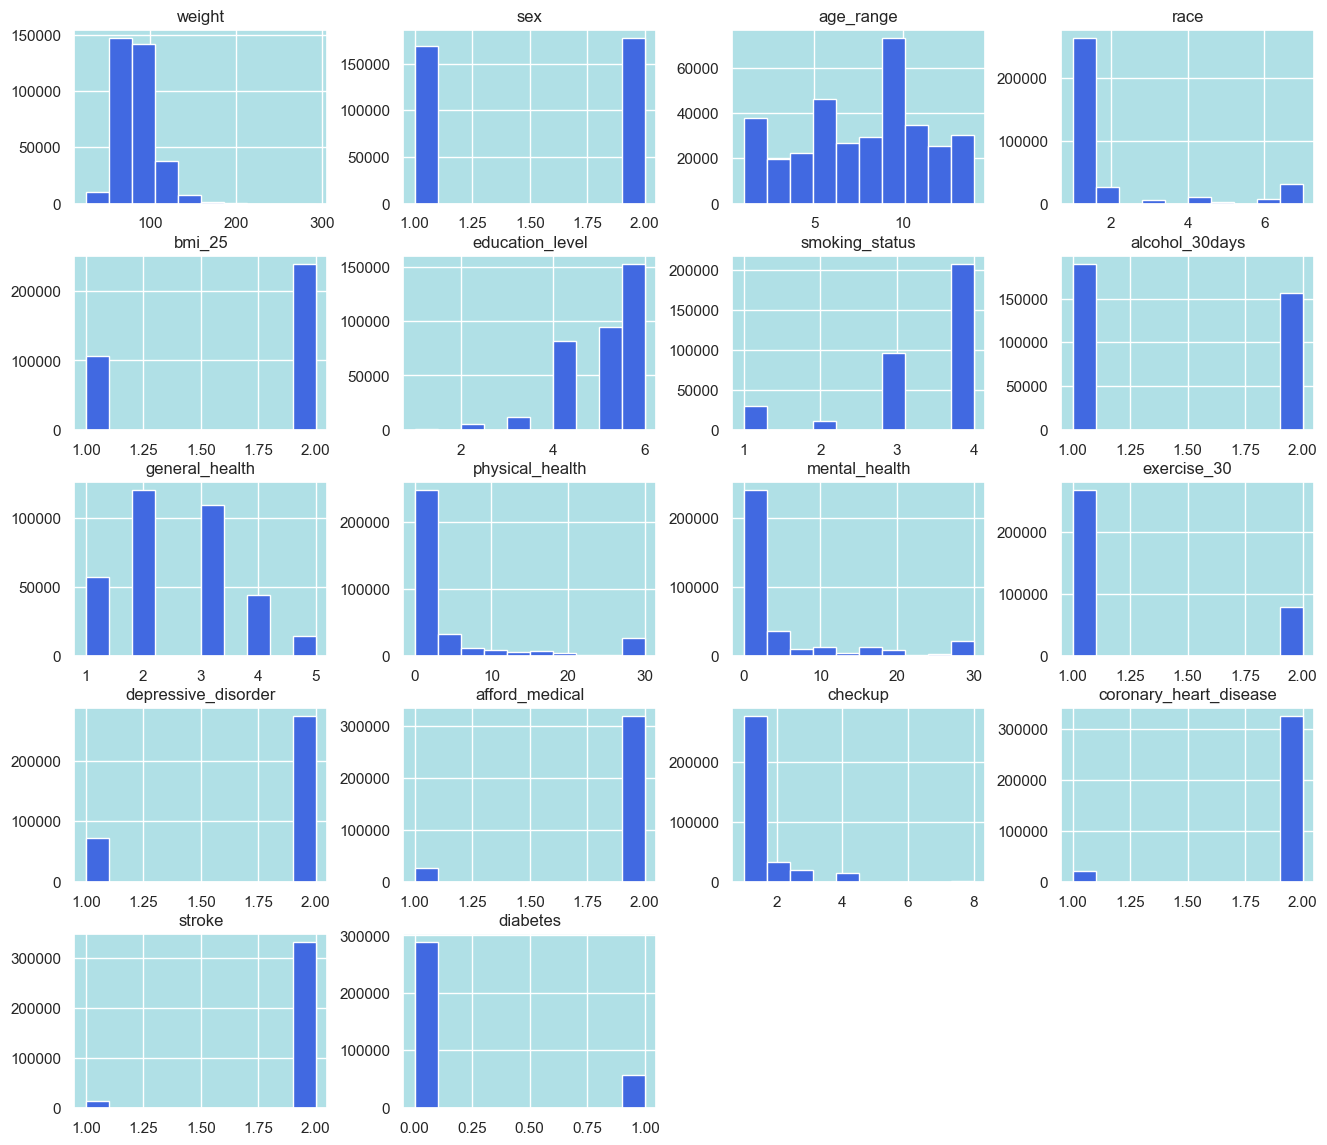

In [53]:
BRFSS_V3.hist(figsize=(16,14), color='royalblue')
plt.show()

In [54]:
# Store data to use for dashboarding
BRFSS_V3.to_csv('BRFSS_V3.csv')

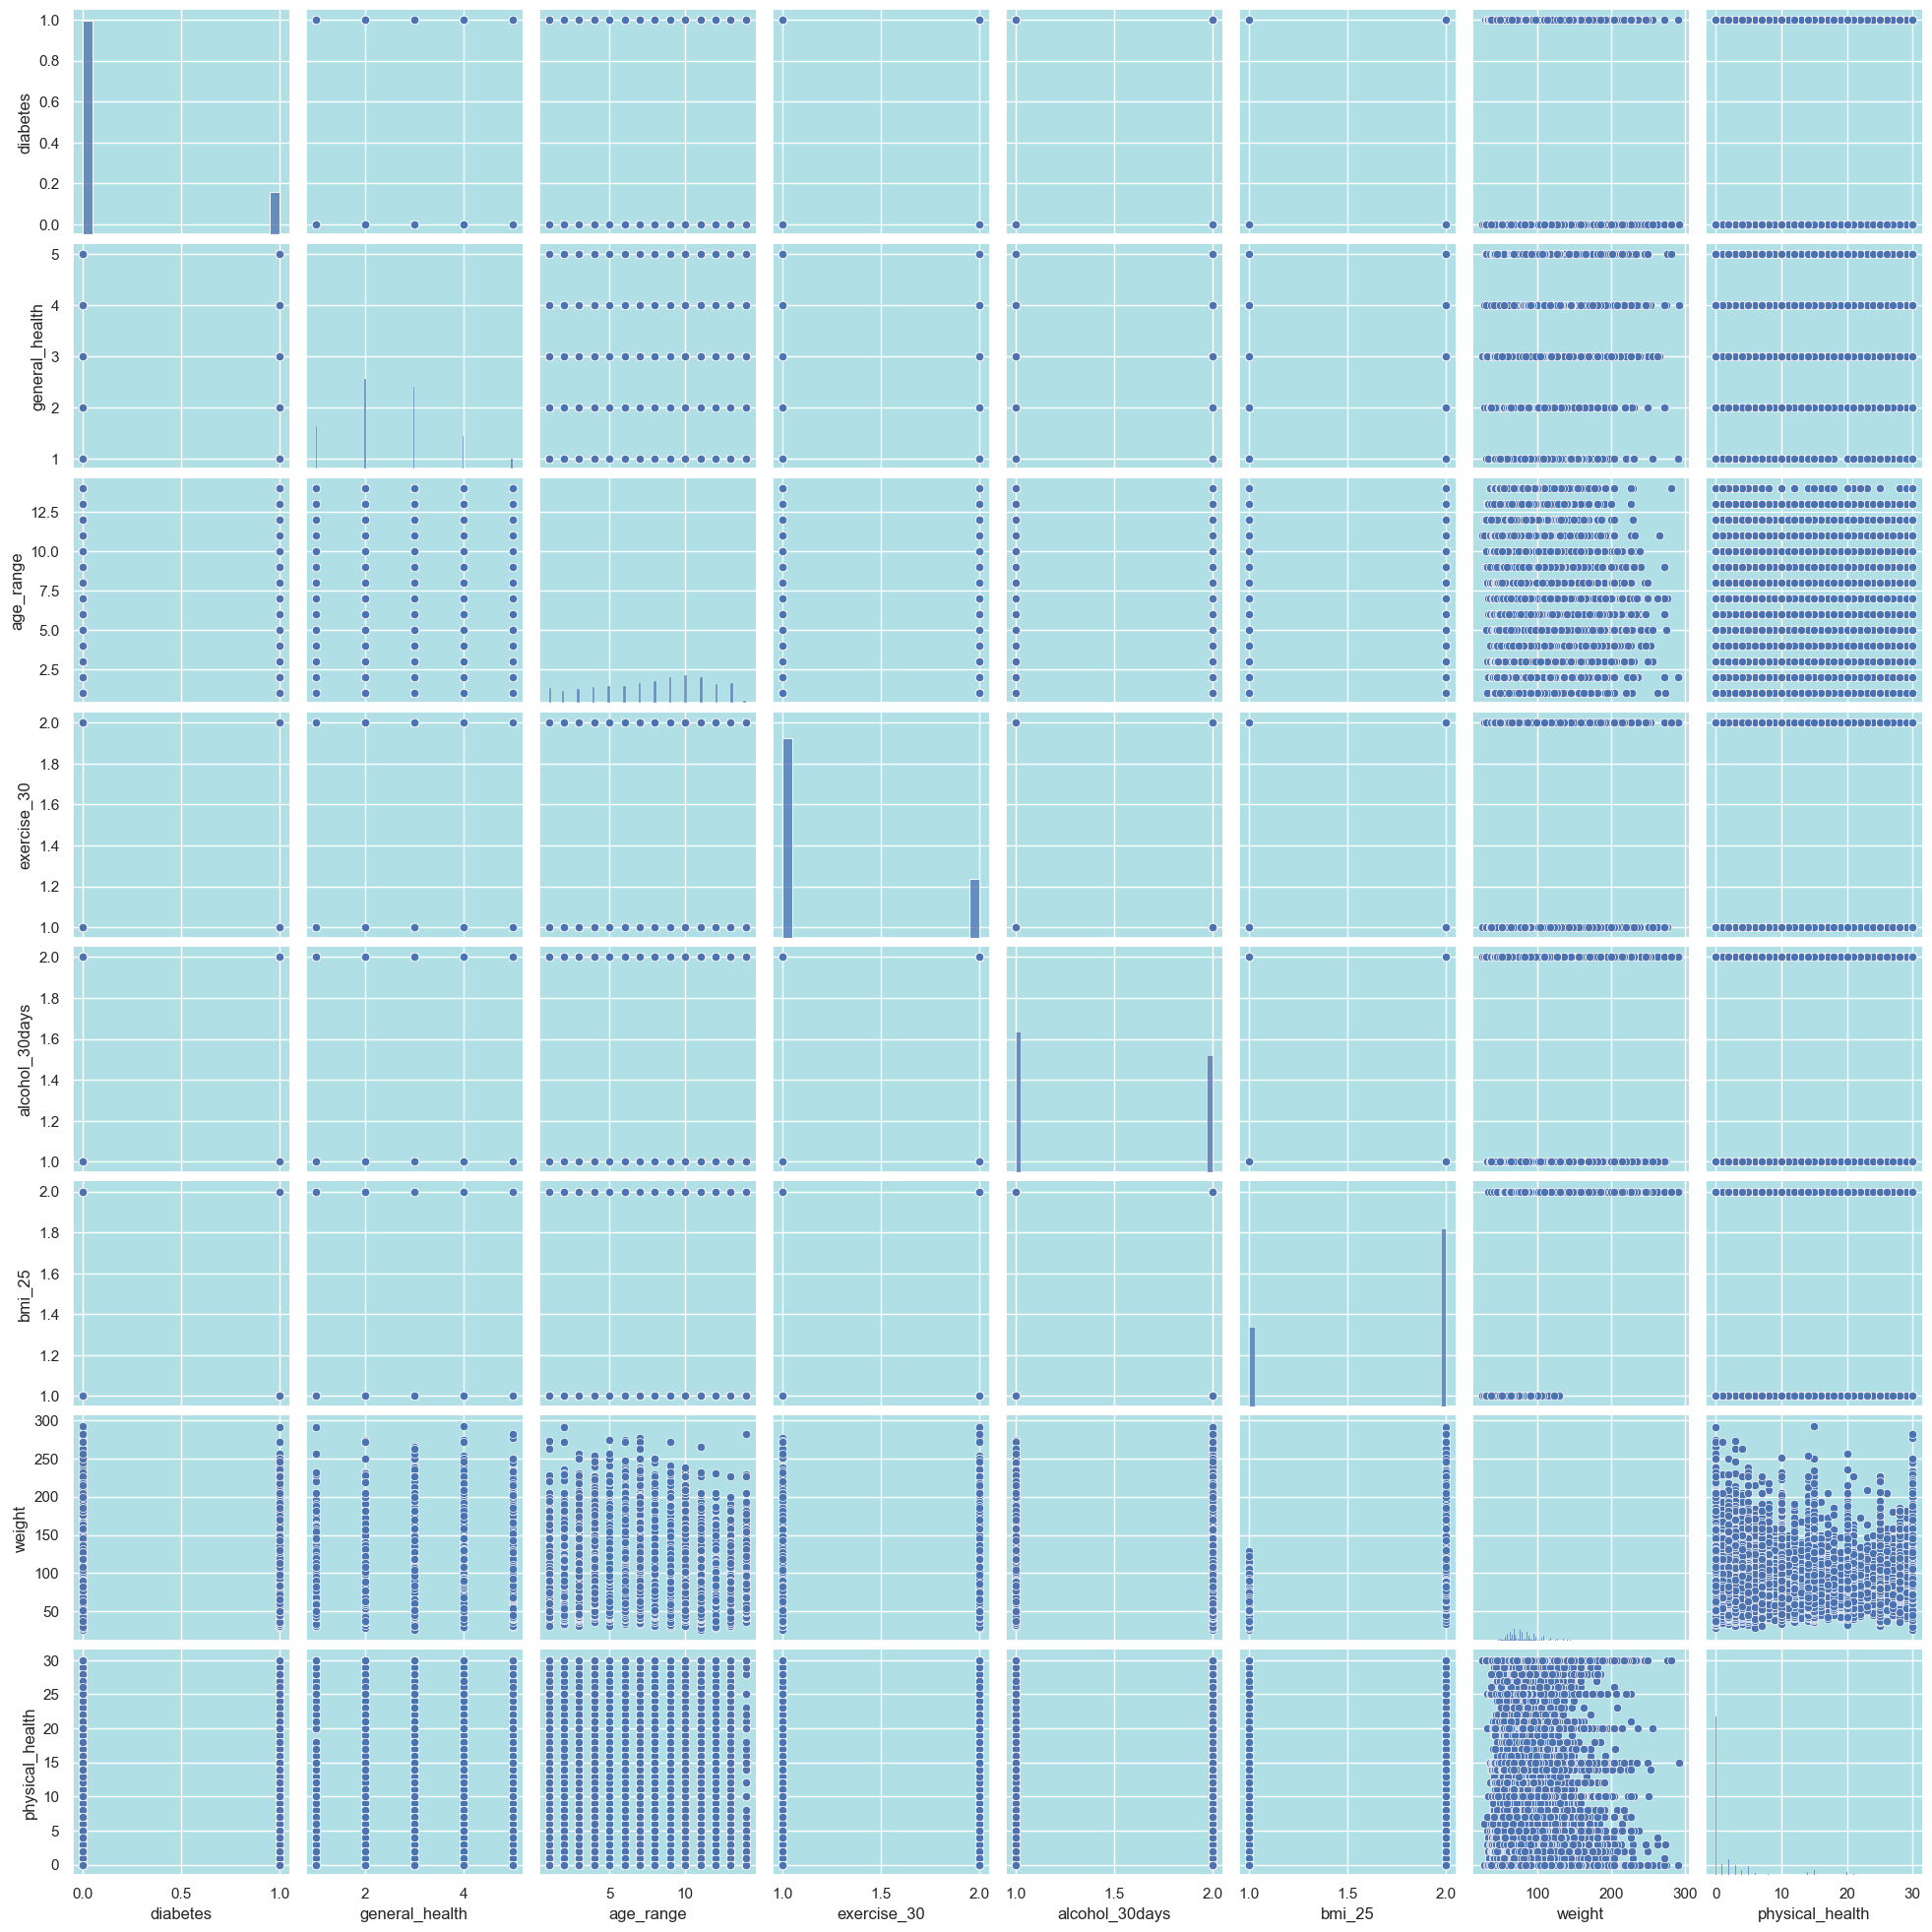

In [55]:
rel = BRFSS_V3.loc[:, ['diabetes', 'general_health', 'age_range', 'exercise_30', 'alcohol_30days', 'bmi_25', 'weight', 'physical_health']]

sns.pairplot(rel)
plt.show()

# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Montserrat;text-align:left;display:fill;border-radius:5px;background-color:teal;overflow:hidden">Machine learning models</div>

Since this is a binary classification problem (predicting diabetes: yes(1) or no (0)), here are some suitable machine learning algorithms:

- `Logistic Regression`:

    - Simple and interpretable.
    - Good baseline model for binary classification.

- `Decision Tree`:

    - Non-linear model capable of capturing complex relationships.
    - Easy to interpret but prone to overfitting.

- `Random Forest`:

    - Ensemble method based on multiple decision trees.
    - Reduces overfitting compared to a single decision tree.
    - Generally provides good performance for classification tasks.

- `Gradient Boosting Machines (e.g., XGBoost, LightGBM)`:

    - Powerful ensemble techniques that can provide high accuracy.
    - Handles both linear and non-linear relationships well.

- `Support Vector Machine (SVM)`:

    - Effective for high-dimensional spaces.
    - Requires tuning of hyperparameters and is computationally intensive.

-  `Neural Networks`:

    - Flexible and can capture complex patterns.
    - Requires more data and computational resources.

Steps to Implement a Classification Model

- `Data Preprocessing`:

    - Handle missing values.
    - Encode categorical variables.
    - Normalize/scale numerical features.

- `Train-Test Split`:

    - Split the data into training and testing sets.

- `Model Training and Evaluation`:

    - Train multiple models and evaluate their performance using appropriate metrics (accuracy, precision, recall, F1-score, ROC-AUC).

- `Hyperparameter Tuning`:

    - Optimize the chosen model using techniques like Grid Search or Random Search.

> <span style='font-size:28px; font-family:Verdana;color: orange;'><b>Data preparation</b></span>

In [56]:
# Define features and target
features = BRFSS_V3.drop('diabetes', axis=1)
target = BRFSS_V3['diabetes']

# Handle missing values by imputing with mean for numeric features
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(features), columns=features.columns)

# Apply Min-Max Scaling to all columns
scaler = MinMaxScaler()
features_scaled = pd.DataFrame(scaler.fit_transform(X_imputed), columns=features.columns)

# Split the data
x_train, x_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.25, random_state=42)

#### `Evaluation Metrics`

In [160]:
def model_accuracy(y_train, training_pred, y_test, testing_pred):
    acccuracy = accuracy_score(y_train, training_pred)
    acccuracy_test = accuracy_score(y_test, testing_pred)
    print(f'Training accuracy score : {acccuracy * 100:.2f}%')
    print(f'Testing accuracy score  : {acccuracy_test * 100:.2f}%')

def report(y_test, prediction):
    # Create a dataframe of the classification report
    report_df = classification_report(y_test, prediction)
    print('Classification report   :\n')
    print(report_df)

def auc_roc(y_values, prob_prediction):
    print(f'AUC-ROC score           : {(roc_auc_score(y_values, prob_prediction) * 100):.2f}%')
    print('\n')

def conf_matrix(y_train, training_pred, y_test, testing_pred):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    cf = confusion_matrix(y_train, training_pred, normalize='true')
    cf2 = confusion_matrix(y_test, testing_pred, normalize='true')
    
    sns.heatmap(cf, cmap='YlOrRd', annot=True, ax=axes[0])
    axes[0].set_title('Training Matrix')
    axes[0].set_xlabel('Prediction')
    axes[0].set_ylabel('Target')
    
    sns.heatmap(cf2, cmap='YlOrRd', annot=True, ax=axes[1])
    axes[1].set_title('Testing Matrix')
    axes[1].set_xlabel('Prediction')
    axes[1].set_ylabel('Target')
    plt.suptitle('Confusion Matrix', fontsize=15)
    plt.show()

> <span style='font-size:28px; font-family:Verdana;color: orange;'><b>Logistic Regression</b></span>

Training accuracy score : 83.70%
Testing accuracy score  : 83.69%
AUC-ROC score           : 78.72%


Classification report   :

              precision    recall  f1-score   support

           0       0.85      0.98      0.91     72093
           1       0.54      0.14      0.23     14404

    accuracy                           0.84     86497
   macro avg       0.69      0.56      0.57     86497
weighted avg       0.80      0.84      0.80     86497



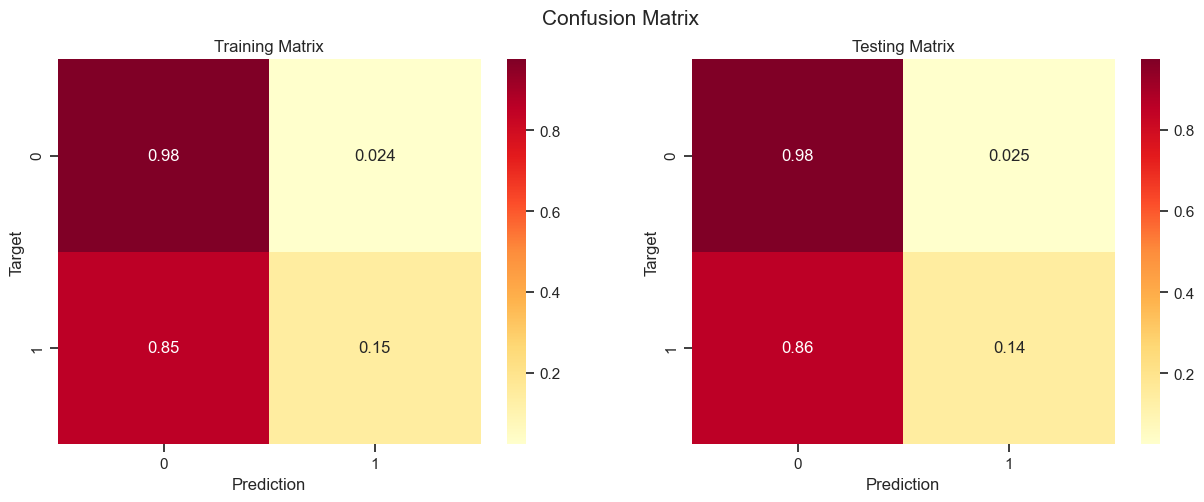

In [161]:
# Train the model
model_lr = LogisticRegression(C=1, penalty='l2', solver='liblinear', max_iter=1000)
model_lr.fit(x_train, y_train)

# Make predictions
test_pred_lr = model_lr.predict(x_test)
train_pred_lr = model_lr.predict(x_train)

# Predict probabilities and evaluate using AUC-ROC
y_pred_proba_lr = model_lr.predict_proba(x_test)[:, 1]

# Evaluating the model
accuracy_lr = model_accuracy(y_train, train_pred_lr, y_test, test_pred_lr)
auc_lr = auc_roc(y_test, y_pred_proba_lr)
rep_lr = report(y_test, test_pred_lr)
confm_lr = conf_matrix(y_train, train_pred_lr, y_test, test_pred_lr)

> <span style='font-size:28px; font-family:Verdana;color: orange;'><b>Random Forest</b></span>

Training accuracy score : 98.54%
Testing accuracy score  : 82.55%
AUC-ROC score           : 75.16%


Classification report   :

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     72093
           1       0.45      0.20      0.28     14404

    accuracy                           0.83     86497
   macro avg       0.65      0.58      0.59     86497
weighted avg       0.79      0.83      0.80     86497



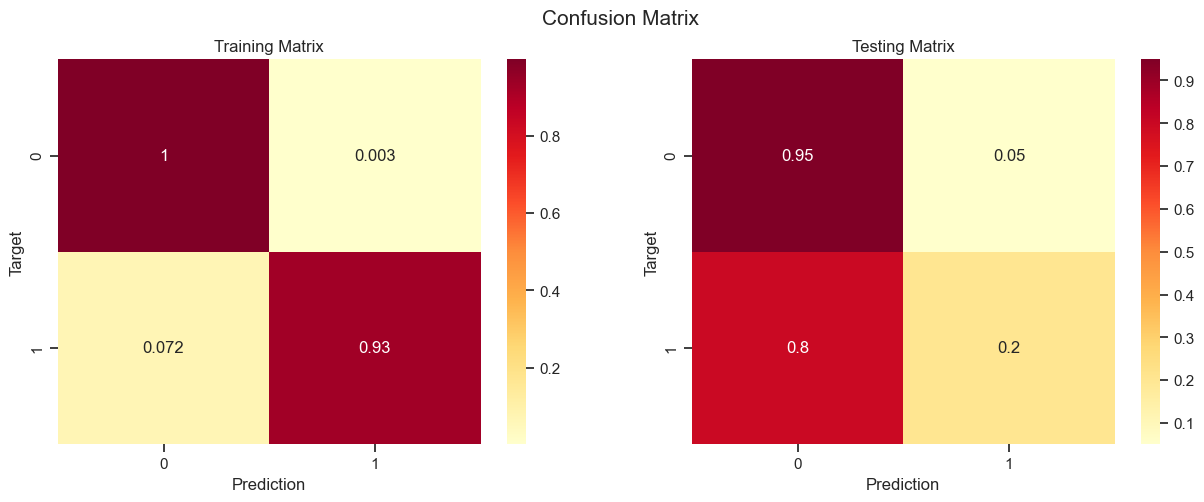

In [162]:
# Train the model
model_rf = RandomForestClassifier(n_jobs=-1, random_state=42)
model_rf.fit(x_train, y_train)

# Make predictions
test_pred_rf = model_rf.predict(x_test)
train_pred_rf = model_rf.predict(x_train)

# Predict probabilities and evaluate using AUC-ROC
y_pred_proba_rf = model_rf.predict_proba(x_test)[:, 1]

# Evaluating the model
accuracy_rf = model_accuracy(y_train, train_pred_rf, y_test, test_pred_rf)
auc_rf = auc_roc(y_test, y_pred_proba_rf)
rep_rf = report(y_test, test_pred_rf)
confm_rf = conf_matrix(y_train, train_pred_rf, y_test, test_pred_rf)

#### The Discrepancy between the training accuracy (98.54%) and the validation accuracy (82.55%) suggests that the Random Forest model might be overfitting. Hyperparameter tuning can help address this issue by finding the optimal parameters that balance bias and variance

> <span style='font-size:28px; font-family:Verdana;color: orange;'><b>Decision Tree</b></span>

Training accuracy score : 98.54%
Testing accuracy score  : 76.84%
AUC-ROC score           : 59.11%


Classification report   :

              precision    recall  f1-score   support

           0       0.86      0.86      0.86     72093
           1       0.31      0.32      0.31     14404

    accuracy                           0.77     86497
   macro avg       0.59      0.59      0.59     86497
weighted avg       0.77      0.77      0.77     86497



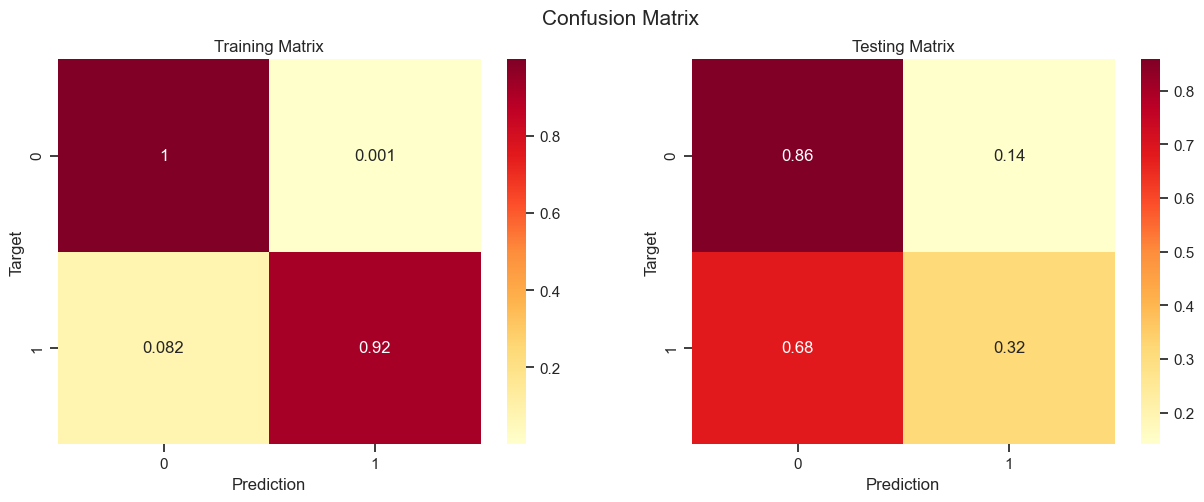

In [163]:
# Train the model
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(x_train, y_train)

# Make predictions
test_pred_dt = model_dt.predict(x_test)
train_pred_dt = model_dt.predict(x_train)

# Predict probabilities and evaluate using AUC-ROC
y_pred_proba_dt = model_dt.predict_proba(x_test)[:, 1]

# Evaluating the model
accuracy_dt = model_accuracy(y_train, train_pred_dt, y_test, test_pred_dt)
auc_dt = auc_roc(y_test, y_pred_proba_dt)
rep_dt = report(y_test, test_pred_dt)
confm_dt = conf_matrix(y_train, train_pred_dt, y_test, test_pred_dt)

#### Hyperparameter Tuning of Decision Tree is also needed as there is a big difference between training model score and validation model score 

> <span style='font-size:28px; font-family:Verdana;color: orange;'><b>KNeighbors</b></span>

Training accuracy score : 86.35%
Testing accuracy score  : 81.55%
AUC-ROC score           : 69.24%


Classification report   :

              precision    recall  f1-score   support

           0       0.86      0.93      0.89     72093
           1       0.40      0.22      0.28     14404

    accuracy                           0.82     86497
   macro avg       0.63      0.58      0.59     86497
weighted avg       0.78      0.82      0.79     86497



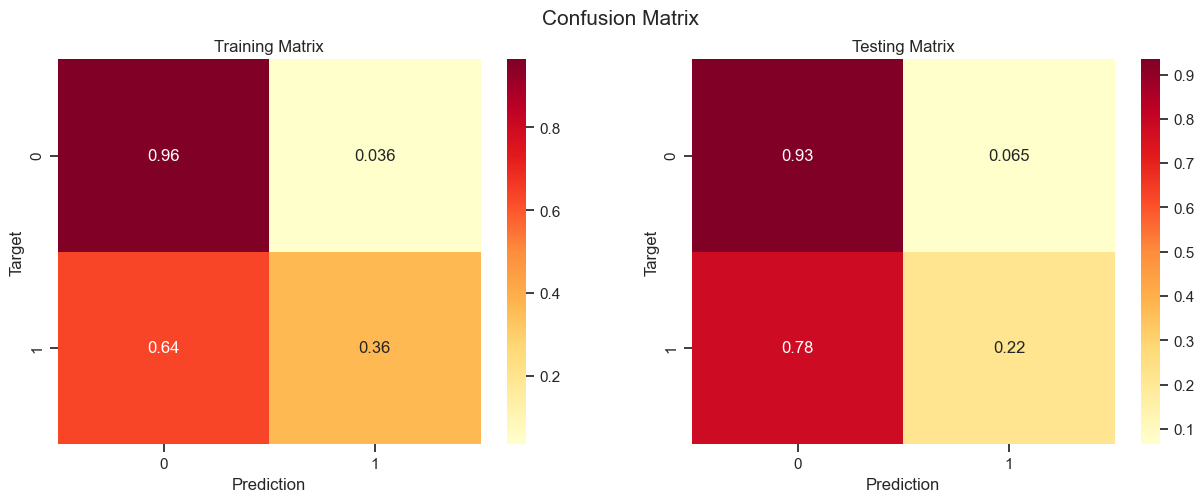

In [164]:
# Train the model
model_kn = KNeighborsClassifier(n_neighbors=5)
model_kn.fit(x_train, y_train)

# Make predictions
test_pred_kn = model_kn.predict(x_test)
train_pred_kn = model_kn.predict(x_train)

# Predict probabilities and evaluate using AUC-ROC
y_pred_proba_kn = model_kn.predict_proba(x_test)[:, 1]

# Evaluating the model
accuracy_kn = model_accuracy(y_train, train_pred_kn, y_test, test_pred_kn)
auc_kn = auc_roc(y_test, y_pred_proba_kn)
rep_kn = report(y_test, test_pred_kn)
confm_kn = conf_matrix(y_train, train_pred_kn, y_test, test_pred_kn)

#### Hyperparameter tuning can improve performance of this model

> <span style='font-size:28px; font-family:Verdana;color: orange;'><b>Support Vector Classifier</b></span>

`Replaced SVC with LinearSVC for faster performance`

Training accuracy score : 83.64%
Testing accuracy score  : 83.71%
AUC-ROC score           : 78.67%


Classification report   :

              precision    recall  f1-score   support

           0       0.84      0.99      0.91     72093
           1       0.59      0.07      0.13     14404

    accuracy                           0.84     86497
   macro avg       0.71      0.53      0.52     86497
weighted avg       0.80      0.84      0.78     86497



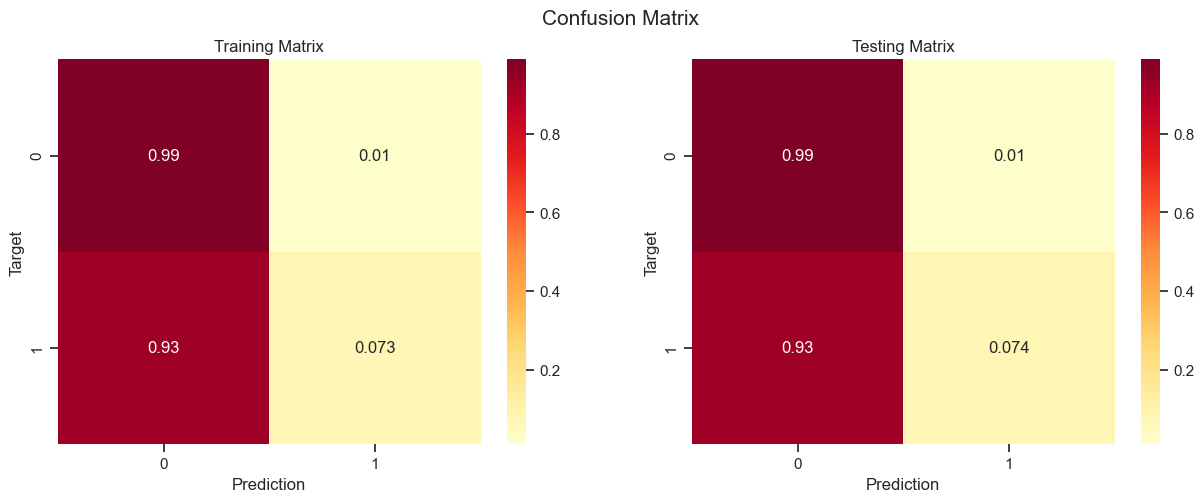

In [166]:
# Train the model
model_sv = LinearSVC(random_state=42)
model_sv.fit(x_train, y_train)

# Make predictions
test_pred_sv = model_sv.predict(x_test)
train_pred_sv = model_sv.predict(x_train)

# Predict decision function and evaluate using AUC-ROC
y_pred_proba_sv = model_sv.decision_function(x_test)

# Evaluating the model
accuracy_sv = model_accuracy(y_train, train_pred_sv, y_test, test_pred_sv)
auc_sv = auc_roc(y_test, y_pred_proba_sv)
rep_sv = report(y_test, test_pred_sv)
confm_sv = conf_matrix(y_train, train_pred_sv, y_test, test_pred_sv)

> <span style='font-size:28px; font-family:Verdana;color: orange;'><b>Adaboost Classifier</b></span>

Training accuracy score : 83.87%
Testing accuracy score  : 83.87%
AUC-ROC score           : 79.27%


Classification report   :

              precision    recall  f1-score   support

           0       0.85      0.97      0.91     72093
           1       0.55      0.16      0.25     14404

    accuracy                           0.84     86497
   macro avg       0.70      0.57      0.58     86497
weighted avg       0.80      0.84      0.80     86497



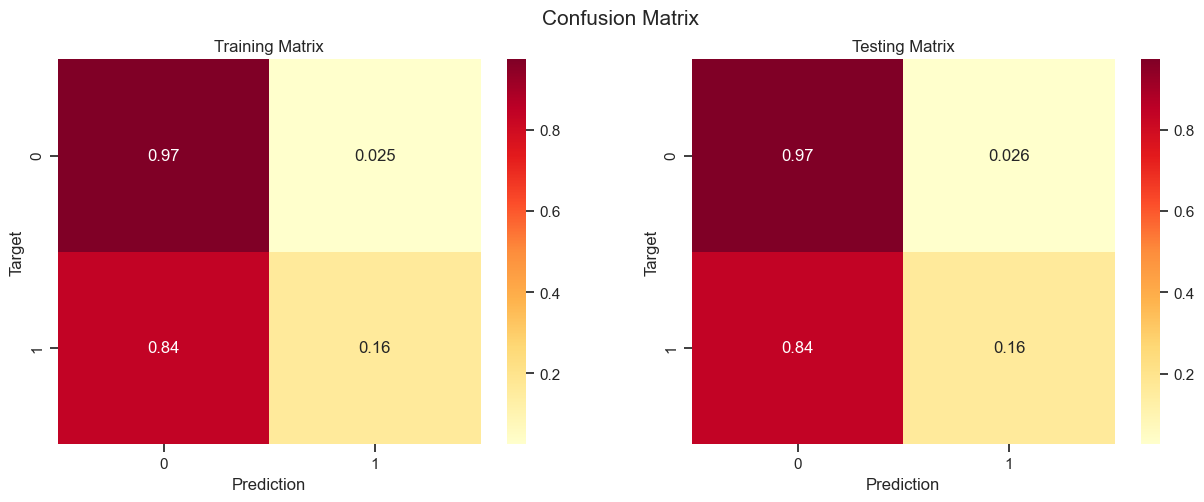

In [167]:
# Train the model
model_ada = AdaBoostClassifier(random_state=42)
model_ada.fit(x_train, y_train)

# Make predictions
test_pred_ada = model_ada.predict(x_test)
train_pred_ada = model_ada.predict(x_train)

# Predict probabilities and evaluate using AUC-ROC
y_pred_proba_ada = model_ada.predict_proba(x_test)[:, 1]

# Evaluating the model
accuracy_ada = model_accuracy(y_train, train_pred_ada, y_test, test_pred_ada)
auc_ada = auc_roc(y_test, y_pred_proba_ada)
rep_ada = report(y_test, test_pred_ada)
confm_ada = conf_matrix(y_train, train_pred_ada, y_test, test_pred_ada)

> <span style='font-size:28px; font-family:Verdana;color: orange;'><b>Gradient Boosting Classifier</b></span>

Training accuracy score : 83.95%
Testing accuracy score  : 83.97%
AUC-ROC score           : 79.65%


Classification report   :

              precision    recall  f1-score   support

           0       0.85      0.97      0.91     72093
           1       0.56      0.17      0.26     14404

    accuracy                           0.84     86497
   macro avg       0.71      0.57      0.59     86497
weighted avg       0.81      0.84      0.80     86497



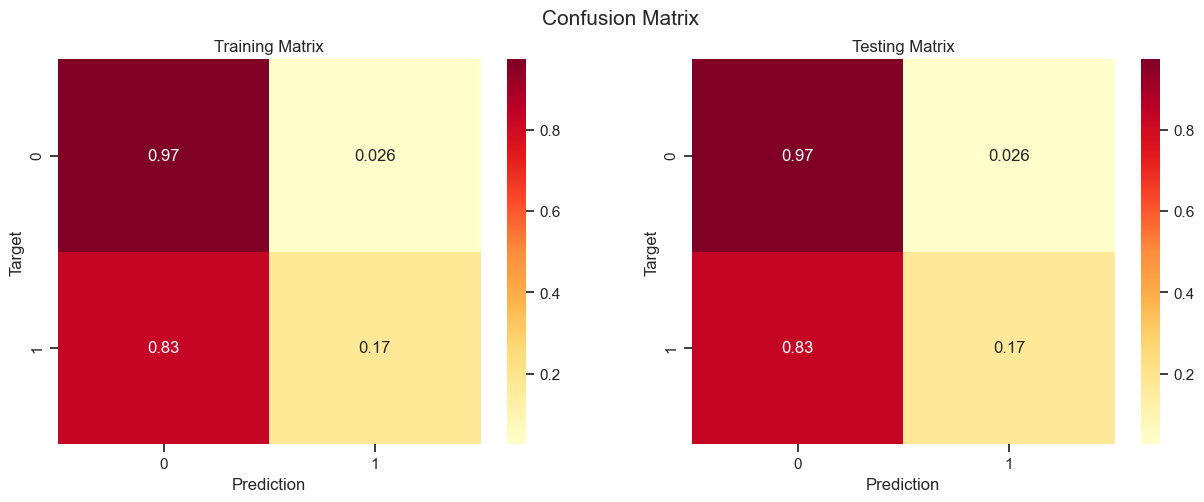

In [168]:
# Train the model
model_gb = GradientBoostingClassifier(random_state=42)
model_gb.fit(x_train, y_train)

# Make predictions
test_pred_gb = model_gb.predict(x_test)
train_pred_gb = model_gb.predict(x_train)

# Predict probabilities and evaluate using AUC-ROC
y_pred_proba_gb = model_gb.predict_proba(x_test)[:, 1]

# Evaluating the model
accuracy_gb = model_accuracy(y_train, train_pred_gb, y_test, test_pred_gb)
auc_gb = auc_roc(y_test, y_pred_proba_gb)
rep_gb = report(y_test, test_pred_gb)
confm_gb = conf_matrix(y_train, train_pred_gb, y_test, test_pred_gb)

> <span style='font-size:28px; font-family:Verdana;color: orange;'><b>XGBoost Classifier</b></span>

Training accuracy score : 84.83%
Testing accuracy score  : 83.88%
AUC-ROC score           : 79.52%


Classification report   :

              precision    recall  f1-score   support

           0       0.85      0.97      0.91     72093
           1       0.55      0.17      0.26     14404

    accuracy                           0.84     86497
   macro avg       0.70      0.57      0.59     86497
weighted avg       0.80      0.84      0.80     86497



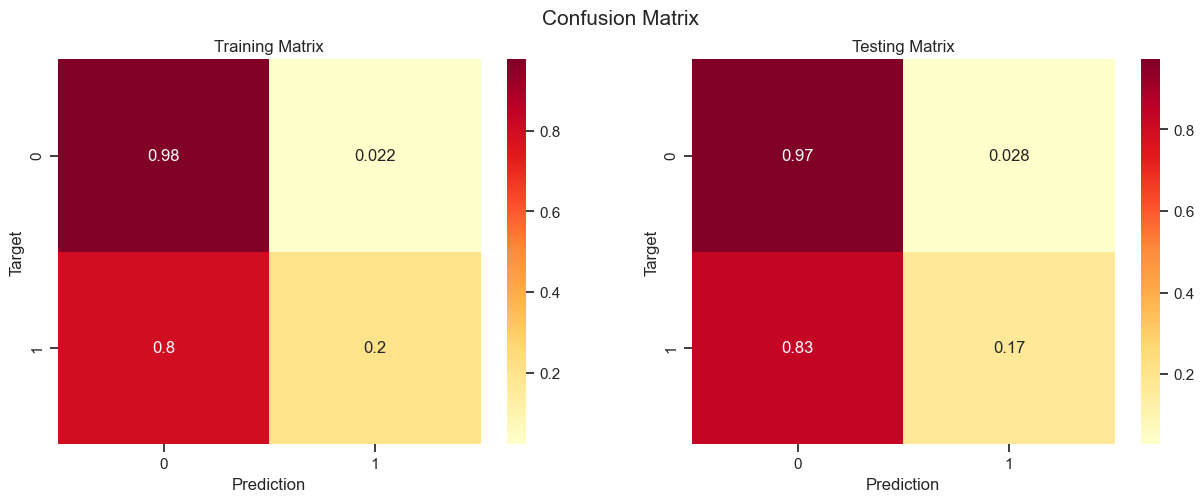

In [169]:
# Train the model
model_xg = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model_xg.fit(x_train, y_train)

# Make predictions
test_pred_xg = model_xg.predict(x_test)
train_pred_xg = model_xg.predict(x_train)

# Predict probabilities and evaluate using AUC-ROC
y_pred_proba_xg = model_xg.predict_proba(x_test)[:, 1]

# Evaluating the model
accuracy_xg = model_accuracy(y_train, train_pred_xg, y_test, test_pred_xg)
auc_xg = auc_roc(y_test, y_pred_proba_xg)
rep_xg = report(y_test, test_pred_xg)
confm_xg = conf_matrix(y_train, train_pred_xg, y_test, test_pred_xg)

> <span style='font-size:28px; font-family:Verdana;color: orange;'><b>Neural Network</b></span>

Training accuracy score : 84.03%
Testing accuracy score  : 83.82%
AUC-ROC score           : 79.60%


Classification report   :

              precision    recall  f1-score   support

           0       0.86      0.97      0.91     72093
           1       0.54      0.20      0.29     14404

    accuracy                           0.84     86497
   macro avg       0.70      0.58      0.60     86497
weighted avg       0.80      0.84      0.81     86497



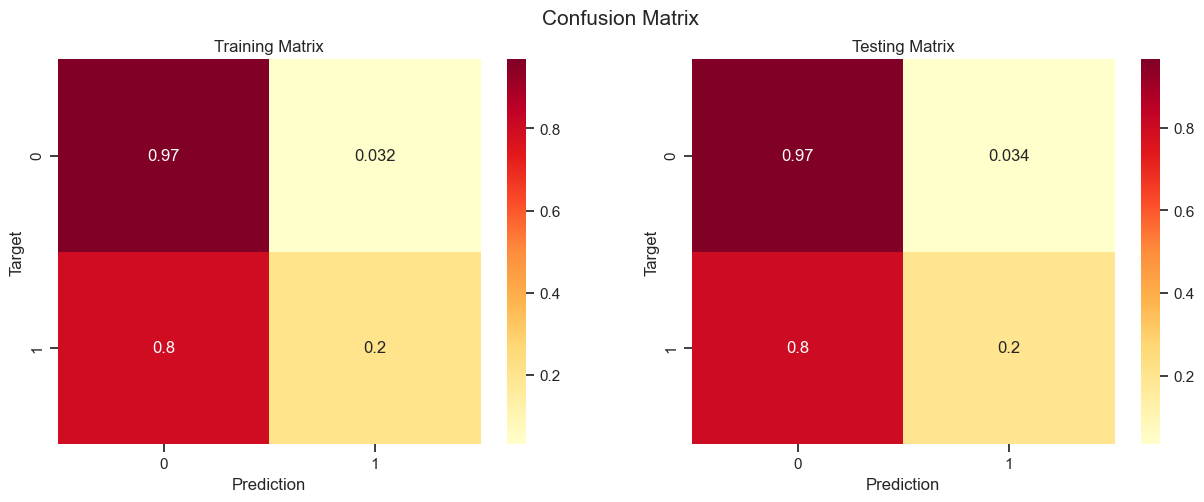

In [170]:
# Train the model
model_mlp = MLPClassifier(random_state=42)
model_mlp.fit(x_train, y_train)

# Make predictions
test_pred_mlp = model_mlp.predict(x_test)
train_pred_mlp = model_mlp.predict(x_train)

# Predict probabilities and evaluate using AUC-ROC
y_pred_proba_mlp = model_mlp.predict_proba(x_test)[:, 1]

# Evaluating the model
accuracy_mlp = model_accuracy(y_train, train_pred_mlp, y_test, test_pred_mlp)
auc_mlp = auc_roc(y_test, y_pred_proba_mlp)
rep_mlp = report(y_test, test_pred_mlp)
confm_mlp = conf_matrix(y_train, train_pred_mlp, y_test, test_pred_mlp)

> <span style='font-size:28px; font-family:Verdana;color: orange;'><b>Hyperparameter tuning</b></span>

#### `Random Forest`

In [173]:
# Define the parameter grid with fewer combinations
param_dist_rfh = {
    'n_estimators': [100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Define the scorer for AUC-ROC
roc_auc_scorer = make_scorer(roc_auc_score, needs_proba=True)

# Initialize RandomizedSearchCV
random_search_rfh = RandomizedSearchCV(estimator=model_rf, param_distributions=param_dist_rfh, n_iter=100, scoring=roc_auc_scorer, cv=3, random_state=42, n_jobs=-1, verbose=0)

# Fit RandomizedSearchCV
random_search_rfh.fit(x_train, y_train)

# Best parameters and estimator
best_params_rfh = random_search_rfh.best_params_
best_model_rfh = random_search_rfh.best_estimator_

# Predict with the best estimator
y_pred_train_rfh = best_model_rfh.predict(x_train)
y_pred_test_rfh = best_model_rfh.predict(x_test)
y_pred_proba_rfh = best_model_rfh.predict_proba(x_test)[:, 1]

# Evaluate the model
accuracy_rfh = model_accuracy(y_train, y_pred_train_rfh, y_test, y_pred_test_rfh)
auc_rfh = auc_roc(y_test, y_pred_proba_rfh)
rep_rfh = report(y_test, y_pred_test_rfh)

# Best parameters
print('Best parameters found by RandomizedSearchCV for Random Forest model :\n', best_params_rfh)

Training accuracy score : 84.04%
Testing accuracy score  : 83.85%
AUC-ROC score           : 79.45%


Classification report   :

              precision    recall  f1-score   support

           0       0.84      0.99      0.91     72093
           1       0.61      0.09      0.15     14404

    accuracy                           0.84     86497
   macro avg       0.73      0.54      0.53     86497
weighted avg       0.80      0.84      0.78     86497

Best parameters found by RandomizedSearchCV for Random Forest model :
 {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}


#### `Decision Tree`

In [174]:
# Define the hyperparameter grid
param_dist_dth = {
    'max_depth': [1, 50],
    'min_samples_split': [2, 20],
    'min_samples_leaf': [1, 20],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy']
}

# Initialize RandomizedSearchCV
random_search_dth = RandomizedSearchCV(estimator=model_dt, param_distributions=param_dist_dth, n_iter=100, scoring=roc_auc_scorer, cv=3, random_state=42, n_jobs=-1, verbose=0)

# Fit the model
random_search_dth.fit(x_train, y_train)

# Get the best parameters
best_params_dth = random_search_dth.best_params_
best_model_dth = random_search_dth.best_estimator_

# Predict with the best estimator
y_pred_train_dth = best_model_dth.predict(x_train)
y_pred_test_dth = best_model_dth.predict(x_test)
y_pred_proba_dth = best_model_dth.predict_proba(x_test)[:, 1]

# Evaluate the model
accuracy_dth = model_accuracy(y_train, y_pred_train_dth, y_test, y_pred_test_dth)
auc_dth = auc_roc(y_test, y_pred_proba_dth)
rep_dth = report(y_test, y_pred_test_dth)

# Best parameters
print('Best parameters found by RandomizedSearchCV for Decision Tree model :\n', best_params_dth)

Training accuracy score : 84.50%
Testing accuracy score  : 83.24%
AUC-ROC score           : 75.64%


Classification report   :

              precision    recall  f1-score   support

           0       0.85      0.97      0.91     72093
           1       0.49      0.16      0.24     14404

    accuracy                           0.83     86497
   macro avg       0.67      0.56      0.57     86497
weighted avg       0.79      0.83      0.80     86497

Best parameters found by RandomizedSearchCV for Decision Tree model :
 {'min_samples_split': 2, 'min_samples_leaf': 20, 'max_features': 'sqrt', 'max_depth': 50, 'criterion': 'entropy'}


#### `K Nearest Neighbors`

In [175]:
# Define the hyperparameter grid
param_dist_knh = {
    'n_neighbors': [1, 30],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize RandomizedSearchCV
random_search_knh = RandomizedSearchCV(estimator=model_kn, param_distributions=param_dist_knh, n_iter=100, scoring=roc_auc_scorer, cv=3, random_state=42, n_jobs=-1, verbose=0)

# Fit the model
random_search_knh.fit(x_train, y_train)

# Get the best parameters
best_params_knh = random_search_knh.best_params_
best_model_knh = random_search_knh.best_estimator_

# Predict with the best estimator
y_pred_train_knh = best_model_knh.predict(x_train)
y_pred_test_knh = best_model_knh.predict(x_test)
y_pred_proba_knh = best_model_knh.predict_proba(x_test)[:, 1]

# Evaluate the model
accuracy_knh = model_accuracy(y_train, y_pred_train_knh, y_test, y_pred_test_knh)
auc_knh = auc_roc(y_test, y_pred_proba_knh)
rep_knh = report(y_test, y_pred_test_knh)

# Best parameters
print('Best parameters found by RandomizedSearchCV for KNearest model :\n', best_params_dth)

Training accuracy score : 84.07%
Testing accuracy score  : 83.52%
AUC-ROC score           : 76.65%


Classification report   :

              precision    recall  f1-score   support

           0       0.85      0.98      0.91     72093
           1       0.53      0.11      0.18     14404

    accuracy                           0.84     86497
   macro avg       0.69      0.54      0.54     86497
weighted avg       0.79      0.84      0.79     86497

Best parameters found by RandomizedSearchCV for KNearest model :
 {'min_samples_split': 2, 'min_samples_leaf': 20, 'max_features': 'sqrt', 'max_depth': 50, 'criterion': 'entropy'}


# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Montserrat;text-align:left;display:fill;border-radius:5px;background-color:teal;overflow:hidden">Results</div>

##### `Below is a table of ML models and their performance, (H) means after after hyperparameter tuning :`

| model               | training_acc | testing_acc | auc-roc | average score |
|---------------------|--------------|-------------|---------|---------------|
| Logistic Regression | 83.70%       | 83.69%      | 78.72%  |    82.04%     |
| Random Forest       | 98.54%       | 82.55%      | 75.16%  |    85.42%     |
| Decision Tree       | 98.54%       | 76.84%      | 59.11%  |    78.83%     |
| KNearest            | 86.35%       | 81.55%      | 69.20%  |    79.70%     |
| Linear SVM          | 83.64%       | 83.71%      | 78.67%  |    82.67%     |
| Adaboost            | 83.87%       | 83.87%      | 79.27%  |    82.34%     |
| Gradient Boost      | 83.95%       | 83.97%      | 79.65%  |    82.52%     |
| Xgboost             | 84.83%       | 83.88%      | 79.52%  |    82.74%     |
| Neural network      | 84.03%       | 83.82%      | 79.60%  |    82.48%     |
| Random Forest (H)   | 84.04%       | 83.85%      | 79.45%  |    82.45%     |
| Decision Tree (H)   | 84.50%       | 83.24%      | 75.64%  |    81.13%     |
| KNearest (H)        | 84.07%       | 83.52%      | 76.65%  |    81.41%     |

#### `Model Performance Overview`

- **Logistic Regression** and **Linear SVM** show very similar performance across all metrics, with balanced training and testing accuracy and moderate AUC-ROC scores, indicating they generalize well.
- **Random Forest** achieves the highest training accuracy (98.54%) but shows a significant drop in testing accuracy (82.55%) and AUC-ROC (75.16%), suggesting it may be overfitting the training data.
- **Decision Tree** also has very high training accuracy (98.54%) but much lower testing accuracy (76.84%) and AUC-ROC (59.11%), indicating strong overfitting and poor generalization.
- **Adaboost**, **Gradient Boost**, and **Xgboost** show competitive performance with balanced accuracies and relatively high AUC-ROC scores, making them strong contenders.
- **Neural Network** performs well with balanced accuracies and a high AUC-ROC score, indicating good generalization capabilities.

#### `Generalization and Overfitting`

- **Overfitting** is evident in the Random Forest and Decision Tree models, where training accuracy is much higher than testing accuracy. This suggests that while these models fit the training data very well, they fail to generalize to unseen data.
- Models like **Logistic Regression**, **Linear SVM**, **Adaboost**, **Gradient Boost**, and **Neural Network** exhibit less overfitting with closer training and testing accuracies, indicating better generalization.

#### `Model Selection Recommendations`

- **Adaboost**, **Gradient Boost**, and **Xgboost** stand out with good performance across all metrics. They balance accuracy and AUC-ROC well, making them robust choices.
- **Logistic Regression** and **Linear SVM** are also reliable choices due to their simplicity and balanced performance.
- While **Neural Network** performs well, its complexity might be unnecessary given that simpler models like Logistic Regression and Adaboost provide comparable results.

#### `Average Score Consideration`

- **Gradient Boost**, **Xgboost**, and **Neural Network** have the highest average scores, making them top candidates.
- **Random Forest (H)** and **Decision Tree (H)** show improvements over their non-hyperparameter-tuned counterparts, but still do not outperform the boosting algorithms.

#### `Final Recommendations`

- For a balance of performance and simplicity, **Logistic Regression**, **Adaboost**, and **Gradient Boost** are recommended.
- For slightly higher performance with added complexity, **Xgboost** and **Neural Network** are strong candidates.
- Care should be taken with **Random Forest** and **Decision Tree** due to their tendency to overfit; however, hyperparameter tuning can help mitigate this issue.